<div class="alert alert-block alert-info" style="text-align: center;">

# MSDS 593 EDA and Visualization 
# Group Project 
### Submitted by Group 14
### Yan Naing Aung, Venkatachalam Subramanian, Cheryl Lee

</div>

In [238]:
# Importing Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set()

In [240]:
# Avoiding Warning Messages
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-success">
    
### Links for Reference - Research on Montgomery Police Services and Departments

- https://www.arcgis.com/apps/Viewer/index.html?appid=4317830a05654b8f907e65515970a5ba
- https://data.census.gov/profile/Montgomery_County,_Maryland?g=050XX00US24031#race-and-ethnicity
- https://en.wikipedia.org/wiki/Montgomery_County_Police_Department
- https://www.montgomerycountymd.gov/pol/bureaus/index.html
- https://www.montgomerycountymd.gov/pol/districts.html


<div class="alert alert-block alert-warning">
    
# Preliminary Analysis and Cleaning of Data 

In [264]:
# importing data
police_arrest_data = pd.read_csv('police.csv')
df = police_arrest_data.copy()

The ID Reference Number column likely serves as a unique identifier for each arrest record.

The Subject's race, Subject's gender, Subject's age, and Ethnicity columns provide demographic information about the individuals who were arrested.

The District of occurrence column likely indicates the district in which the arrest took place.

The Adjacent to School column is particularly interesting. It appears to indicate whether the arrest took place within 500 feet of a school, with a 1 indicating that it did and a 0 indicating that it did not. This could be useful for analyzing patterns in where arrests occur.

The Assigned Division and Assigned Bureau columns likely indicate the division and bureau of the police department that were assigned to the arrest.

Finally, the Event Date/Time column provides the date and time of the arrest. This could be useful for analyzing patterns in when arrests occur.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23510 entries, 0 to 23509
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Reference Number     23510 non-null  int64  
 1   Subject's race          23510 non-null  object 
 2   Subject's gender        23510 non-null  object 
 3   Subject's age           23510 non-null  int64  
 4   Ethnicity               23510 non-null  object 
 5   District of occurrence  23408 non-null  float64
 6   Adjacent to School      23510 non-null  int64  
 7   Assigned Division       23381 non-null  object 
 8   Assigned Bureau         18851 non-null  object 
 9   Event Date/Time         23510 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.8+ MB


In [12]:
df.describe()

,ID Reference Number,Subject's age,District of occurrence,Adjacent to School
count,23510.00000,23510.000000,23408.000000,23510.000000
mean,11755.50000,31.813143,3.989192,0.085155
std,6786.89675,12.946909,1.748587,0.279119
min,1.00000,1.000000,1.000000,0.000000
25%,5878.25000,22.000000,3.000000,0.000000
50%,11755.50000,30.000000,4.000000,0.000000
75%,17632.75000,39.000000,5.000000,0.000000
max,23510.00000,99.000000,8.000000,1.000000


In [14]:
df.isna().sum()

ID Reference Number          0
Subject's race               0
Subject's gender             0
Subject's age                0
Ethnicity                    0
District of occurrence     102
Adjacent to School           0
Assigned Division          129
Assigned Bureau           4659
Event Date/Time              0
dtype: int64

In [16]:
#dont need refrence ID
df = df.drop(df.columns[0], axis = 1)

In [18]:
df

,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time
0,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,1/1/2021 1:07
1,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
2,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
3,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
4,White,Female,38,HISPANIC,4.0,0,TOD,FSB,1/1/2021 3:00
...,...,...,...,...,...,...,...,...,...
23505,Black/African American,Male,30,NON-HISPANIC,3.0,0,3D,PSB,6/30/2024 11:00
23506,Asian,Male,60,NON-HISPANIC,3.0,0,3D,PSB,7/1/2024 7:27
23507,White,Male,22,HISPANIC,4.0,0,2D,PSB,6/29/2024 2:42
23508,White,Male,25,HISPANIC,4.0,0,2D,PSB,6/29/2024 2:42


In [20]:
df.isna().sum()

Subject's race               0
Subject's gender             0
Subject's age                0
Ethnicity                    0
District of occurrence     102
Adjacent to School           0
Assigned Division          129
Assigned Bureau           4659
Event Date/Time              0
dtype: int64

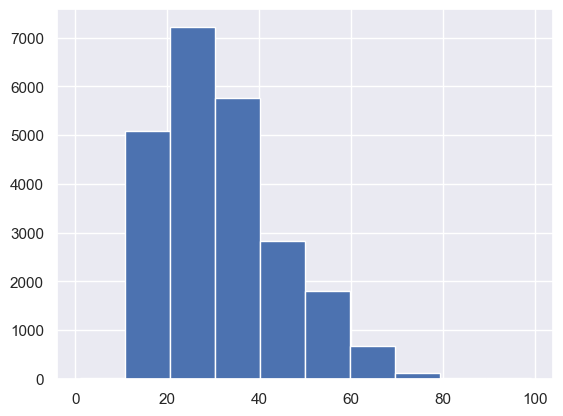

In [22]:
plt.hist(df['Subject\'s age'])
plt.show()

In [24]:
df = df[(df['Subject\'s age'] >= 10) & (df['Subject\'s age'] <= 80)]
df

,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time
0,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,1/1/2021 1:07
1,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
2,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
3,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
4,White,Female,38,HISPANIC,4.0,0,TOD,FSB,1/1/2021 3:00
...,...,...,...,...,...,...,...,...,...
23505,Black/African American,Male,30,NON-HISPANIC,3.0,0,3D,PSB,6/30/2024 11:00
23506,Asian,Male,60,NON-HISPANIC,3.0,0,3D,PSB,7/1/2024 7:27
23507,White,Male,22,HISPANIC,4.0,0,2D,PSB,6/29/2024 2:42
23508,White,Male,25,HISPANIC,4.0,0,2D,PSB,6/29/2024 2:42


filter age between 10 and 80 to eliminate outliers

In [27]:
df['Subject\'s race'].value_counts()

Subject's race
Black/African American       11492
White                        11246
Asian                          630
Unknown                         71
American Indian/ALSK Natv       35
Hawaiian/Pacific Islander       20
Name: count, dtype: int64

In [29]:
df = df[df['Subject\'s race'] != 'Unknown']
df

,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time
0,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,1/1/2021 1:07
1,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
2,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
3,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
4,White,Female,38,HISPANIC,4.0,0,TOD,FSB,1/1/2021 3:00
...,...,...,...,...,...,...,...,...,...
23505,Black/African American,Male,30,NON-HISPANIC,3.0,0,3D,PSB,6/30/2024 11:00
23506,Asian,Male,60,NON-HISPANIC,3.0,0,3D,PSB,7/1/2024 7:27
23507,White,Male,22,HISPANIC,4.0,0,2D,PSB,6/29/2024 2:42
23508,White,Male,25,HISPANIC,4.0,0,2D,PSB,6/29/2024 2:42


In [31]:
df['Assigned Division'].value_counts(dropna = False)

Assigned Division
3D      4317
4D      3891
5D      3489
GPD     2391
2D      1866
6D      1763
RCPD    1277
TOD     1024
1D       921
TPPD     782
IMTD     463
CED      360
SID      253
SVID     247
NaN      129
MCD       75
CID       74
MCFM      49
MCSO      19
PSTA      17
SOD        7
FSB        4
ISB        3
PSCC       1
PERS       1
Name: count, dtype: int64

In [33]:
df = df.dropna(subset = ['Assigned Division'])
df

,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time
0,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,1/1/2021 1:07
1,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
2,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
3,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
4,White,Female,38,HISPANIC,4.0,0,TOD,FSB,1/1/2021 3:00
...,...,...,...,...,...,...,...,...,...
23505,Black/African American,Male,30,NON-HISPANIC,3.0,0,3D,PSB,6/30/2024 11:00
23506,Asian,Male,60,NON-HISPANIC,3.0,0,3D,PSB,7/1/2024 7:27
23507,White,Male,22,HISPANIC,4.0,0,2D,PSB,6/29/2024 2:42
23508,White,Male,25,HISPANIC,4.0,0,2D,PSB,6/29/2024 2:42


In [35]:
df.isna().sum()

Subject's race               0
Subject's gender             0
Subject's age                0
Ethnicity                    0
District of occurrence     102
Adjacent to School           0
Assigned Division            0
Assigned Bureau           4512
Event Date/Time              0
dtype: int64

In [37]:
df = df[df['District of occurrence'] != 8.0]

In [39]:
df = df[df['Assigned Division'] != 'TPPD']

In [41]:
df[df["Assigned Bureau"].isna()]["Assigned Division"].value_counts()

Assigned Division
GPD     2391
RCPD    1277
MCFM      49
MCSO      13
Name: count, dtype: int64

In [43]:
#impute district based on other division
#if assigned division is 1d or RCPD and district of occurenece is null fill in 1

def fill_district(division, district):
  if pd.isnull(district) and division in division_district_map:
    return division_district_map.get(division)
  else:
    return district

division_district_map = {'3D': 3.0, '2D': 2.0, '4D': 4.0, 'GPD': 6.0, '5D': 5.0, '6D': 6.0, 'RCPD': 1.0, '1D': 1.0}

df['District of occurrence'] = df.apply(lambda row: fill_district(row['Assigned Division'], row['District of occurrence']), axis=1)

In [45]:
df.isna().sum()

Subject's race               0
Subject's gender             0
Subject's age                0
Ethnicity                    0
District of occurrence       0
Adjacent to School           0
Assigned Division            0
Assigned Bureau           3730
Event Date/Time              0
dtype: int64

In [47]:
df1 = df.copy()

In [49]:
df1.isna().sum()

Subject's race               0
Subject's gender             0
Subject's age                0
Ethnicity                    0
District of occurrence       0
Adjacent to School           0
Assigned Division            0
Assigned Bureau           3730
Event Date/Time              0
dtype: int64

In [51]:
# Impute Bureau based on Division
# We know that MCFM belongs to ISB and MCSO belongs to PSB

df['Assigned Bureau'] = df.apply(lambda row: 'ISB' if row['Assigned Division'] == 'MCFM' 
                                 else ('PSB' if row['Assigned Division'] == 'MCSO' else row['Assigned Bureau']), axis=1)

In [53]:
df.isna().sum()

Subject's race               0
Subject's gender             0
Subject's age                0
Ethnicity                    0
District of occurrence       0
Adjacent to School           0
Assigned Division            0
Assigned Bureau           3668
Event Date/Time              0
dtype: int64

In [55]:
df["Event Date/Time"] = pd.to_datetime(df["Event Date/Time"], format='%m/%d/%Y %H:%M')

df["Year"] = df["Event Date/Time"].dt.year
df["Month"] = df["Event Date/Time"].dt.month
df["Month Name"] = df["Event Date/Time"].dt.month_name()
df["Day of Week"] = df["Event Date/Time"].dt.dayofweek
df["Hour"] = df["Event Date/Time"].dt.hour

In [57]:
df_f = df[~(df['Year'] == 2024) | (df['Month'] != 7)]

df_f['Month Year'] = df_f['Year'].astype(str) + '-' + df_f['Month Name'].apply(lambda x: x[:3])

df_f['Month Year'] = pd.to_datetime(df_f['Month Year'], format='%Y-%b')

month_year = df_f.groupby('Month Year')['Event Date/Time'].count()

month_year.index = month_year.index.strftime('%Y-%b')

month_year

Month Year
2021-Jan    453
2021-Feb    360
2021-Mar    490
2021-Apr    374
2021-May    433
2021-Jun    420
2021-Jul    438
2021-Aug    480
2021-Sep    522
2021-Oct    525
2021-Nov    530
2021-Dec    612
2022-Jan    497
2022-Feb    492
2022-Mar    655
2022-Apr    520
2022-May    577
2022-Jun    542
2022-Jul    513
2022-Aug    515
2022-Sep    520
2022-Oct    485
2022-Nov    562
2022-Dec    611
2023-Jan    594
2023-Feb    504
2023-Mar    603
2023-Apr    582
2023-May    621
2023-Jun    559
2023-Jul    584
2023-Aug    619
2023-Sep    527
2023-Oct    545
2023-Nov    648
2023-Dec    603
2024-Jan    510
2024-Feb    638
2024-Mar    596
2024-Apr    578
2024-May    624
2024-Jun    430
Name: Event Date/Time, dtype: int64

In [59]:
df_pd = df[df['Assigned Bureau'].isnull()]
df_pd['Assigned Division'].value_counts()

Assigned Division
GPD     2391
RCPD    1277
Name: count, dtype: int64

In [61]:
df_pd = df_pd.drop('Assigned Bureau', axis=1) 

In [63]:
df_pd.isnull().sum()

Subject's race            0
Subject's gender          0
Subject's age             0
Ethnicity                 0
District of occurrence    0
Adjacent to School        0
Assigned Division         0
Event Date/Time           0
Year                      0
Month                     0
Month Name                0
Day of Week               0
Hour                      0
dtype: int64

In [880]:
# df = df[df['Assigned Division'].str[-2:] != 'PD']
# df['Assigned Division'].unique()

In [67]:
df.isnull().sum()

Subject's race               0
Subject's gender             0
Subject's age                0
Ethnicity                    0
District of occurrence       0
Adjacent to School           0
Assigned Division            0
Assigned Bureau           3668
Event Date/Time              0
Year                         0
Month                        0
Month Name                   0
Day of Week                  0
Hour                         0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22494 entries, 0 to 23509
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Subject's race          22494 non-null  object        
 1   Subject's gender        22494 non-null  object        
 2   Subject's age           22494 non-null  int64         
 3   Ethnicity               22494 non-null  object        
 4   District of occurrence  22494 non-null  float64       
 5   Adjacent to School      22494 non-null  int64         
 6   Assigned Division       22494 non-null  object        
 7   Assigned Bureau         18826 non-null  object        
 8   Event Date/Time         22494 non-null  datetime64[ns]
 9   Year                    22494 non-null  int32         
 10  Month                   22494 non-null  int32         
 11  Month Name              22494 non-null  object        
 12  Day of Week             22494 non-null  int32      

In [71]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3668 entries, 1 to 23502
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Subject's race          3668 non-null   object        
 1   Subject's gender        3668 non-null   object        
 2   Subject's age           3668 non-null   int64         
 3   Ethnicity               3668 non-null   object        
 4   District of occurrence  3668 non-null   float64       
 5   Adjacent to School      3668 non-null   int64         
 6   Assigned Division       3668 non-null   object        
 7   Event Date/Time         3668 non-null   datetime64[ns]
 8   Year                    3668 non-null   int32         
 9   Month                   3668 non-null   int32         
 10  Month Name              3668 non-null   object        
 11  Day of Week             3668 non-null   int32         
 12  Hour                    3668 non-null   int32       

In [73]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3668 entries, 1 to 23502
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Subject's race          3668 non-null   object        
 1   Subject's gender        3668 non-null   object        
 2   Subject's age           3668 non-null   int64         
 3   Ethnicity               3668 non-null   object        
 4   District of occurrence  3668 non-null   float64       
 5   Adjacent to School      3668 non-null   int64         
 6   Assigned Division       3668 non-null   object        
 7   Event Date/Time         3668 non-null   datetime64[ns]
 8   Year                    3668 non-null   int32         
 9   Month                   3668 non-null   int32         
 10  Month Name              3668 non-null   object        
 11  Day of Week             3668 non-null   int32         
 12  Hour                    3668 non-null   int32       

In [75]:
df_pd.head()

,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Event Date/Time,Year,Month,Month Name,Day of Week,Hour
1,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,2021-01-01 00:52:00,2021,1,January,4,0
2,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,2021-01-01 00:52:00,2021,1,January,4,0
3,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,2021-01-01 00:52:00,2021,1,January,4,0
6,White,Male,37,HISPANIC,6.0,0,GPD,2021-01-01 04:49:00,2021,1,January,4,4
21,Black/African American,Male,26,NON-HISPANIC,1.0,0,RCPD,2021-01-02 15:30:00,2021,1,January,5,15


In [77]:
df["Event Date/Time"] = pd.to_datetime(df["Event Date/Time"])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22494 entries, 0 to 23509
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Subject's race          22494 non-null  object        
 1   Subject's gender        22494 non-null  object        
 2   Subject's age           22494 non-null  int64         
 3   Ethnicity               22494 non-null  object        
 4   District of occurrence  22494 non-null  float64       
 5   Adjacent to School      22494 non-null  int64         
 6   Assigned Division       22494 non-null  object        
 7   Assigned Bureau         18826 non-null  object        
 8   Event Date/Time         22494 non-null  datetime64[ns]
 9   Year                    22494 non-null  int32         
 10  Month                   22494 non-null  int32         
 11  Month Name              22494 non-null  object        
 12  Day of Week             22494 non-null  int32      

In [81]:
df.head()

,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time,Year,Month,Month Name,Day of Week,Hour
0,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,2021-01-01 01:07:00,2021,1,January,4,1
1,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,2021,1,January,4,0
2,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,2021,1,January,4,0
3,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,2021,1,January,4,0
4,White,Female,38,HISPANIC,4.0,0,TOD,FSB,2021-01-01 03:00:00,2021,1,January,4,3


In [83]:
df

,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time,Year,Month,Month Name,Day of Week,Hour
0,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,2021-01-01 01:07:00,2021,1,January,4,1
1,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,2021,1,January,4,0
2,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,2021,1,January,4,0
3,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,2021,1,January,4,0
4,White,Female,38,HISPANIC,4.0,0,TOD,FSB,2021-01-01 03:00:00,2021,1,January,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23505,Black/African American,Male,30,NON-HISPANIC,3.0,0,3D,PSB,2024-06-30 11:00:00,2024,6,June,6,11
23506,Asian,Male,60,NON-HISPANIC,3.0,0,3D,PSB,2024-07-01 07:27:00,2024,7,July,0,7
23507,White,Male,22,HISPANIC,4.0,0,2D,PSB,2024-06-29 02:42:00,2024,6,June,5,2
23508,White,Male,25,HISPANIC,4.0,0,2D,PSB,2024-06-29 02:42:00,2024,6,June,5,2


<div class="alert alert-block alert-warning">

# Exporting  Cleaned Data

In [85]:
df_pd.to_csv("Police_Department.csv")

In [87]:
df.to_csv("Montgomery_Arrest_Cases.csv")

In [89]:
df = pd.read_csv("Montgomery_Arrest_Cases.csv")
df_pd = pd.read_csv("Police_Department.csv")

<div class="alert alert-block alert-warning">

# Exploratory Data Analysis and Visualization

<div class="alert alert-block alert-danger">
    
# Objectives:
1. Analyze demographic trends within the 6 police districts in Montgomery County, comparing arrest trends with population data.
2. Identify the safest districts in terms of number of school-adjacent crimes to send your chidlren to.
3. Audits demographic data vs. overall population between the Gaithersburg and Rockville City Police Departments.
4. Understand when crimes are happening and general trends over past audits

<div class="alert alert-block alert-info">
    
### Study of District wise Demographic Trends in relation to Arrest Cases

In [91]:
df.isna().sum()

Subject's race               0
Subject's gender             0
Subject's age                0
Ethnicity                    0
District of occurrence       0
Adjacent to School           0
Assigned Division            0
Assigned Bureau           3668
Event Date/Time              0
Year                         0
Month                        0
Month Name                   0
Day of Week                  0
Hour                         0
dtype: int64

In [93]:
actual_demographic = pd.DataFrame({
    'Race': ['White', 'African American', 'Asian', 'Native American and Hawaiian'],
    'Count': [457783, 197077, 163507, 7646]
})
actual_demographic

#https://data.census.gov/table/DECENNIALDHC2020.P8?g=050XX00US24031

,Race,Count
0,White,457783
1,African American,197077
2,Asian,163507
3,Native American and Hawaiian,7646


In [95]:
actual_demographic['proportion'] = (actual_demographic['Count'] / np.sum(actual_demographic['Count'])) * 100
actual_demographic = actual_demographic.sort_values(by = 'Race')
actual_demographic

,Race,Count,proportion
1,African American,197077,23.858825
2,Asian,163507,19.794725
3,Native American and Hawaiian,7646,0.925651
0,White,457783,55.420798


In [97]:
df_race = df['Subject\'s race'].copy()
count = df_race.value_counts()
count

Subject's race
Black/African American       11051
White                        10776
Asian                          620
American Indian/ALSK Natv       32
Hawaiian/Pacific Islander       15
Name: count, dtype: int64

In [99]:
df_race = count.reset_index()
df_race.columns = ['race', 'count']
df_race['proportions'] = (df_race['count'] / np.sum(df_race['count'])) * 100
df_race

,race,count,proportions
0,Black/African American,11051,49.128657
1,White,10776,47.906108
2,Asian,620,2.756291
3,American Indian/ALSK Natv,32,0.142260
4,Hawaiian/Pacific Islander,15,0.066684


In [101]:
df_race.loc[3] = df_race.loc[3] + df_race.loc[4]
df_race

,race,count,proportions
0,Black/African American,11051,49.128657
1,White,10776,47.906108
2,Asian,620,2.756291
3,American Indian/ALSK NatvHawaiian/Pacific Isla...,47,0.208945
4,Hawaiian/Pacific Islander,15,0.066684


In [103]:
df_race['race'] = df_race['race'].replace({
    'Black/African American': 'African American',
    'White': 'White',
    'American Indian/ALSK NatvHawaiian/Pacific Islander': 'Native American and Hawaiian',
    'Asian': 'Asian'
})

#'White', 'Black/African-American', 'American Indian', 'Asian', 'Native Hawaiian'

In [105]:
df_race = df_race.sort_values(by = 'race')
df_race = df_race.drop(4)
df_race

,race,count,proportions
0,African American,11051,49.128657
2,Asian,620,2.756291
3,Native American and Hawaiian,47,0.208945
1,White,10776,47.906108


In [107]:
blue = '#75a4f0'
red = '#f069c1'

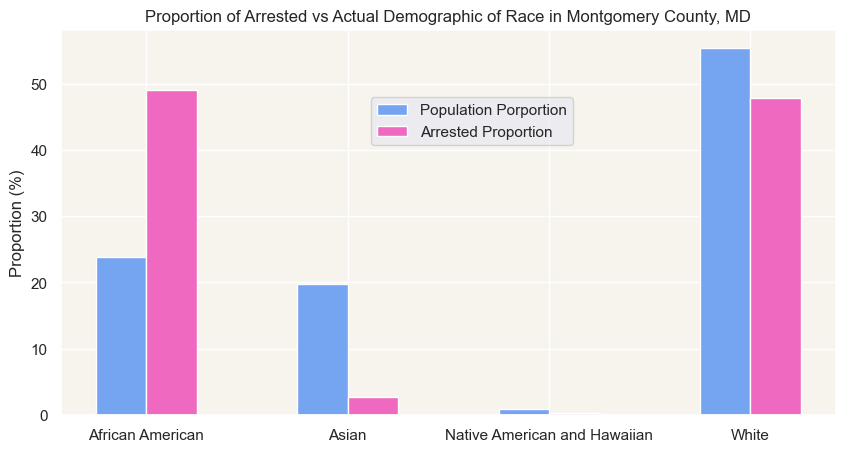

In [109]:
fig, ax = plt.subplots(figsize = (10,5))

w = .25
index = np.arange(len(actual_demographic['Race']))

ax.bar(index - w/2, actual_demographic['proportion'], width = w, label = 'Population Porportion', color = blue)##blue
ax.bar(index + w/2, df_race['proportions'], width = w, label = 'Arrested Proportion', color = red)
ax.patch.set_facecolor('#f7f4ed')

ax.set_xticks(index)
ax.set_xticklabels(df_race['race'])
ax.set_ylabel('Proportion (%)')
plt.title('Proportion of Arrested vs Actual Demographic of Race in Montgomery County, MD')


plt.legend(loc = (.4,.7))
plt.show()

In [111]:
df_district_population = pd.DataFrame({
    'District': [1, 2, 3, 4, 5, 6],
    'Population': [2352 + 51549 + 7196, 38031 + 107273, 270932 + 110880, 129767 + 50029, 64250 + 21954 + 20178, 187670],
    'Asian': [91 + 444 + 1657, 8674 + 11796, 24647 + 14778, 6314 + 27496, 2739 + 1232 + 17677, 31642],
    'African American': [406 + 127 + 5527, 2352 + 5077, 59955 + 46767, 5847 + 12263, 3855 + 1816 + 14644, 38441],
    'White': [5339 + 23291 + 1793, 22821 + 76481, 103502 + 24910, 30858 + 66472, 10435 + 13050 + 20491, 58340]
})

df_district_population['Others'] = df_district_population['Population'] - (np.sum(df_district_population[['Asian', 'African American', 'White']], axis = 1))

arrest_count = df['District of occurrence'].value_counts()
df_district_population['arrest count'] = df_district_population['District'].map(arrest_count)
#https://data.census.gov/profile/Montgomery_County,_Maryland?g=050XX00US24031#race-and-ethnicity

In [113]:
district_ct2 = pd.crosstab(df['District of occurrence'], df['Subject\'s race'])
district_ct2 = district_ct2.reset_index()
district_ct2.columns

Index(['District of occurrence', 'American Indian/ALSK Natv', 'Asian',
       'Black/African American', 'Hawaiian/Pacific Islander', 'White'],
      dtype='object', name='Subject's race')

In [115]:
district_ct2.drop(columns = ['American Indian/ALSK Natv', 'Hawaiian/Pacific Islander'], inplace = True)

In [117]:
district_ct2

Subject's race,District of occurrence,Asian,Black/African American,White
0,1.0,97,1144,1207
1,2.0,83,1174,922
2,3.0,71,3170,1519
3,4.0,112,1748,2658
4,5.0,112,1998,1696
5,6.0,145,1817,2774


In [119]:
df_district_population['Asian arrest count'] = district_ct2['Asian']
df_district_population['White arrest count'] = district_ct2['White']
df_district_population['African American arrest count'] = district_ct2['Black/African American']

In [121]:
df_district_population['proportion actual Asian Population'] = df_district_population['Asian'] / df_district_population['Population']
df_district_population['proportion actual African American Population'] = df_district_population['African American'] / df_district_population['Population']
df_district_population['proportion actual White Population'] = df_district_population['White'] / df_district_population['Population']
df_district_population['proportion Asian Arrested'] = df_district_population['Asian arrest count'] / df_district_population['arrest count']
df_district_population['proportion White Arrested'] = df_district_population['White arrest count'] /  df_district_population['arrest count']
df_district_population['proportion African American Arrested'] = df_district_population['African American arrest count'] / df_district_population['arrest count']

df_district_population

,District,Population,Asian,African American,White,Others,arrest count,Asian arrest count,White arrest count,African American arrest count,proportion actual Asian Population,proportion actual African American Population,proportion actual White Population,proportion Asian Arrested,proportion White Arrested,proportion African American Arrested
0,1,61097,2192,6060,30423,22422,2467,97,1207,1144,0.035877,0.099187,0.497946,0.039319,0.489258,0.463721
1,2,145304,20470,7429,99302,18103,2184,83,922,1174,0.140877,0.051127,0.683409,0.038004,0.422161,0.537546
2,3,381812,39425,106722,128412,107253,4765,71,1519,3170,0.103258,0.279515,0.336323,0.014900,0.318783,0.665268
3,4,179796,33810,18110,97330,30546,4527,112,2658,1748,0.188046,0.100725,0.541336,0.024740,0.587144,0.386128
4,5,106382,21648,20315,43976,20443,3812,112,1696,1998,0.203493,0.190963,0.413378,0.029381,0.444911,0.524134
5,6,187670,31642,38441,58340,59247,4739,145,2774,1817,0.168604,0.204833,0.310865,0.030597,0.585356,0.383414


In [123]:
df_district_population.drop(columns = ['Population','Asian', 'African American', 'White', 'Others', 'arrest count', 'Asian arrest count', 'White arrest count', 'African American arrest count'], inplace = True)

In [125]:
district_population_proportions = df_district_population[['proportion actual Asian Population', 'proportion actual White Population', 'proportion actual African American Population']]
district_arrest_proportions = df_district_population[['proportion Asian Arrested', 'proportion White Arrested', 'proportion African American Arrested']]

In [127]:
district_population_proportions

,proportion actual Asian Population,proportion actual White Population,proportion actual African American Population
0,0.035877,0.497946,0.099187
1,0.140877,0.683409,0.051127
2,0.103258,0.336323,0.279515
3,0.188046,0.541336,0.100725
4,0.203493,0.413378,0.190963
5,0.168604,0.310865,0.204833


In [129]:
district_arrest_proportions

,proportion Asian Arrested,proportion White Arrested,proportion African American Arrested
0,0.039319,0.489258,0.463721
1,0.038004,0.422161,0.537546
2,0.014900,0.318783,0.665268
3,0.024740,0.587144,0.386128
4,0.029381,0.444911,0.524134
5,0.030597,0.585356,0.383414


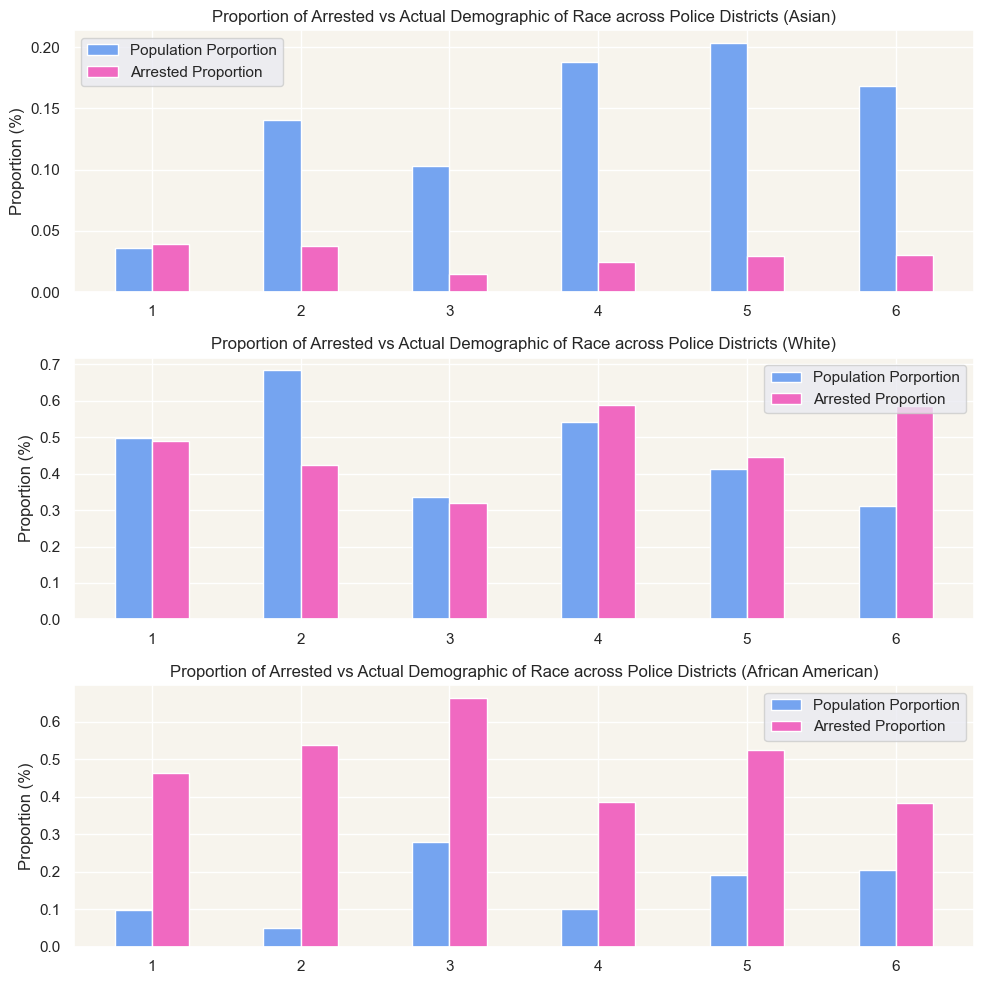

In [131]:
fig, ax = plt.subplots(ncols = 1, nrows = 3, figsize = (10,10))

w = .25
index = np.arange(len(district_arrest_proportions))

#Asian
ax[0].bar(index - w/2, district_population_proportions['proportion actual Asian Population'], width = w, label = 'Population Porportion', color = blue)
ax[0].bar(index + w/2, district_arrest_proportions['proportion Asian Arrested'], width = w, label = 'Arrested Proportion', color = red)
ax[0].patch.set_facecolor('#f7f4ed')

ax[0].set_xticks(index)
ax[0].set_xticklabels(df_district_population['District'])
ax[0].set_ylabel('Proportion (%)')
ax[0].legend()
ax[0].set_title('Proportion of Arrested vs Actual Demographic of Race across Police Districts (Asian)')


#White
ax[1].bar(index - w/2, district_population_proportions['proportion actual White Population'], width = w, label = 'Population Porportion', color = blue)
ax[1].bar(index + w/2, district_arrest_proportions['proportion White Arrested'], width = w, label = 'Arrested Proportion', color = red)
ax[1].patch.set_facecolor('#f7f4ed')

ax[1].set_xticks(index)
ax[1].set_xticklabels(df_district_population['District'])
ax[1].set_ylabel('Proportion (%)')
ax[1].legend()
ax[1].set_title('Proportion of Arrested vs Actual Demographic of Race across Police Districts (White)')

#AA
ax[2].bar(index - w/2, district_population_proportions['proportion actual African American Population'], width = w, label = 'Population Porportion', color = blue)
ax[2].bar(index + w/2, district_arrest_proportions['proportion African American Arrested'], width = w, label = 'Arrested Proportion', color = red)
ax[2].patch.set_facecolor('#f7f4ed')
ax[2].set_xticks(index)
ax[2].set_xticklabels(df_district_population['District'])
ax[2].set_ylabel('Proportion (%)')
ax[2].legend()
ax[2].set_title('Proportion of Arrested vs Actual Demographic of Race across Police Districts (African American)')

plt.tight_layout()
plt.show()

In [135]:
y1=[45.529101, 45.529101+0.137566, 45.529101+0.137566+51.26984]
y2=[55.420798,55.420798+0.851803, 55.420798+0.851803+23.858825]

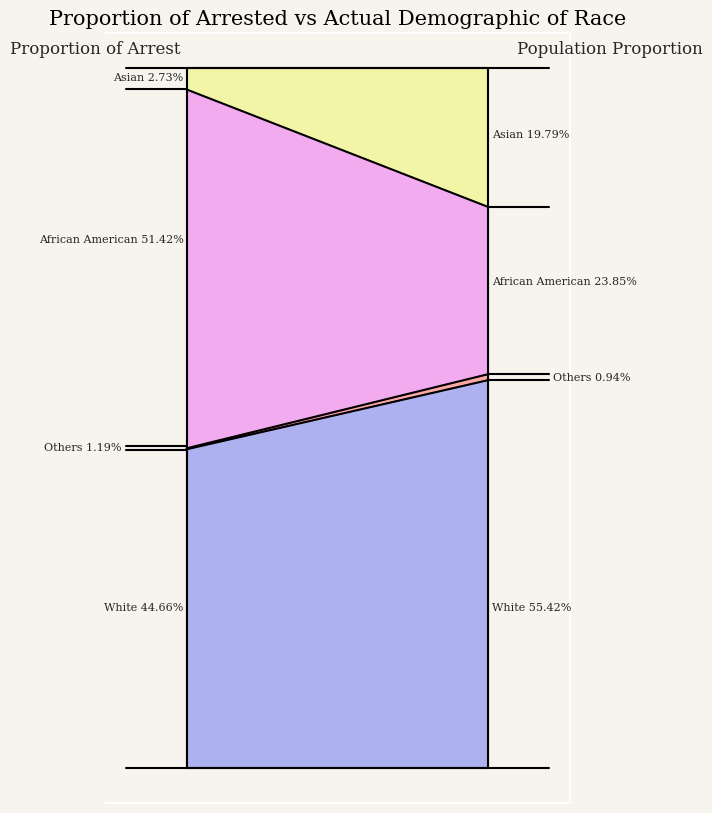

In [137]:
import matplotlib.lines as mlines
fig, ax = plt.subplots(figsize=(6,10))
c=["#f2bc94", "#d4f294", "#94e9f2", "#f294d7"]
#ax.scatter([0,0,0,0],y1,color=c)
#ax.scatter([1,1,1,1],y2,color=c)
ax.plot([0,0],[0,100], color="black")
ax.plot([5,5],[0,100], color="black")
ax.plot([0,5],[100,100], color="black")
ax.plot([0,5],[0,0], color="black")
ax.plot([0, -1],[100, 100], color="black")
ax.plot([0, 6],[100, 100], color="black")
ax.plot([0, -1],[0, 0], color="black")
ax.plot([0, 6],[0, 0], color="black")
ax.plot([0,-1],[y1[2],y1[2]], color="black")
ax.plot([0,-1],[y1[1]+0.3,y1[1]+0.3], color="black")
ax.plot([0,-1],[y1[1]-0.3,y1[1]-0.3], color="black")
ax.plot([5,6],[y2[2],y2[2]], color="black")
ax.plot([5,6],[y2[1],y2[1]], color="black")
ax.plot([5,6],[y2[0],y2[0]], color="black")
for i in range(3):
    ax.plot([0,5],[y1[i], y2[i]], color="black")
ax.set_xticks([0,1,2,3,4,5])
ax.set_yticks(range(0,101,10))
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.spines["left"].set_visible(False)
ax.text(-0.05,22.5, "White 44.66%", ha="right", fontname="serif", fontsize=8)
ax.text(-0.05,75, "African American 51.42%", ha="right", fontname="serif", fontsize=8)
ax.text(-0.05,98.2, "Asian 2.73%", ha="right", fontname="serif", fontsize=8)
ax.text(5.06,22.5, "White 55.42%", fontname="serif", fontsize=8)
ax.text(5.06,69, "African American 23.85%", fontname="serif", fontsize=8)
ax.text(5.06,90, "Asian 19.79%", fontname="serif", fontsize=8)
ax.text(6.07,55.4, "Others 0.94%", fontname="serif", fontsize=8, ha="left")
ax.text(-1.07,45.4, "Others 1.19%", fontname="serif", fontsize=8, ha="right")
ax.patch.set_facecolor('#f7f4ed')
plt.grid(False)
coords1= np.array([[0, 0],[5, 0],[5, y2[0]],[0, y1[0]]])
coords2= np.array([[0, y1[0]],[5, y2[0]],[5, y2[1]],[0, y1[1]]])
coords3= np.array([[0, y1[0]],[5, y2[1]],[5, y2[2]],[0, y1[2]]])
coords4= np.array([[0, y1[2]],[5, y2[2]],[5, 100],[0, 100]])
ax.fill(coords1[:, 0], coords1[:, 1], color='#0217f5', alpha=0.3)
ax.fill(coords2[:, 0], coords2[:, 1], color='red', alpha=0.3)
ax.fill(coords3[:, 0], coords3[:, 1], color='#ed02f5', alpha=0.3)
ax.fill(coords4[:, 0], coords4[:, 1], color='#e9f502', alpha=0.3)
fig.patch.set_facecolor('#f7f4ed')
ax.text(-0.1, 102, "Proportion of Arrest", ha="right", fontname="serif")
ax.text(5.47, 102, "Population Proportion", ha="left", fontname="serif")
plt.title('Proportion of Arrested vs Actual Demographic of Race', color="black", fontname="serif", fontsize=15)
plt.show()

In [139]:
df.isna().sum()

Subject's race               0
Subject's gender             0
Subject's age                0
Ethnicity                    0
District of occurrence       0
Adjacent to School           0
Assigned Division            0
Assigned Bureau           3668
Event Date/Time              0
Year                         0
Month                        0
Month Name                   0
Day of Week                  0
Hour                         0
dtype: int64

In [141]:
district_ct = pd.crosstab(df['District of occurrence'], df['Subject\'s race'])
district_ct

Subject's race,American Indian/ALSK Natv,Asian,Black/African American,Hawaiian/Pacific Islander,White
District of occurrence,,,,,
1.0,9,97,1144,10,1207
2.0,3,83,1174,2,922
3.0,5,71,3170,0,1519
4.0,7,112,1748,2,2658
5.0,6,112,1998,0,1696
6.0,2,145,1817,1,2774


In [143]:
dum_data = {
    'District' : [1, 2, 3, 4, 5, 6],
    'Native American': [3, 3, 5, 7, 6, 2],
    'Asian': [54, 83, 70, 112, 112, 86],
    'African American': [511, 1173, 3169, 1748, 1991, 1091],
    'Native Hawaiian': [0, 2, 0, 2, 0, 1],
    'White': [620, 919, 1517, 2653, 1667, 1219]
}

df_district = pd.DataFrame(dum_data)
df_district

,District,Native American,Asian,African American,Native Hawaiian,White
0,1,3,54,511,0,620
1,2,3,83,1173,2,919
2,3,5,70,3169,0,1517
3,4,7,112,1748,2,2653
4,5,6,112,1991,0,1667
5,6,2,86,1091,1,1219


In [145]:
df_district['Asian/Native American and Hawaiian'] = df_district['Asian'] + df_district['Native American'] + df_district['Native Hawaiian']
df_district = df_district.drop(columns = ['Native American', 'Asian', 'Native Hawaiian'])

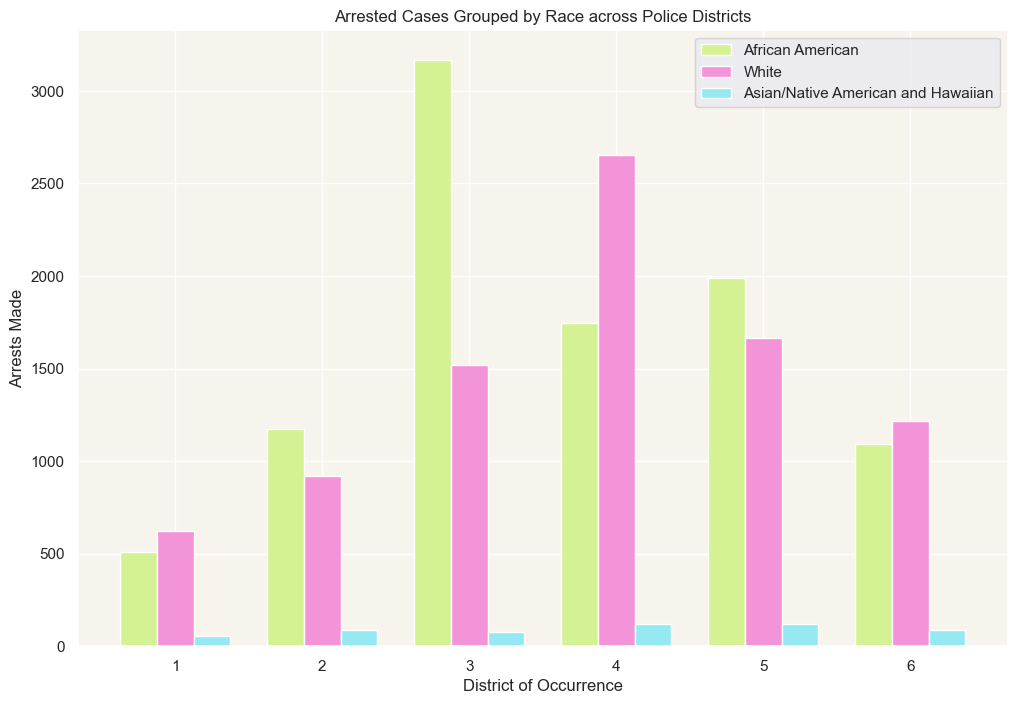

In [147]:
fig, ax = plt.subplots(figsize = (12, 8))

w = .25
index = np.arange(len(df_district))

ax.bar(index - w, df_district['African American'], width = w, label = 'African American', color = '#d4f294')#green
ax.bar(index, df_district['White'], width = w, label = 'White', color = '#f294d7')##pink
ax.bar(index + w, df_district['Asian/Native American and Hawaiian'], width = w, label = 'Asian/Native American and Hawaiian', color = '#94e9f2')##blue
ax.patch.set_facecolor('#f7f4ed')

plt.title('Arrested Cases Grouped by Race across Police Districts')
ax.set_xticks(index)
ax.set_xticklabels(df_district['District'])
ax.set_xlabel('District of Occurrence')
ax.set_ylabel('Arrests Made')


plt.legend()
plt.show()

##not in presentation

In [149]:
df['Event Date/Time'] = pd.to_datetime(df['Event Date/Time'])
df['Month'] = df['Event Date/Time'].dt.month
df

,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time,Year,Month,Month Name,Day of Week,Hour
0,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,2021-01-01 01:07:00,2021,1,January,4,1
1,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,2021,1,January,4,0
2,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,2021,1,January,4,0
3,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,2021,1,January,4,0
4,White,Female,38,HISPANIC,4.0,0,TOD,FSB,2021-01-01 03:00:00,2021,1,January,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23505,Black/African American,Male,30,NON-HISPANIC,3.0,0,3D,PSB,2024-06-30 11:00:00,2024,6,June,6,11
23506,Asian,Male,60,NON-HISPANIC,3.0,0,3D,PSB,2024-07-01 07:27:00,2024,7,July,0,7
23507,White,Male,22,HISPANIC,4.0,0,2D,PSB,2024-06-29 02:42:00,2024,6,June,5,2
23508,White,Male,25,HISPANIC,4.0,0,2D,PSB,2024-06-29 02:42:00,2024,6,June,5,2


In [151]:
district_ct = pd.crosstab(df['Month'], df['District of occurrence'])
ct_16 = district_ct.loc[1:6] / 4
ct_712 = district_ct.loc[7:12] / 3

normalized_district_month = pd.concat([ct_16, ct_712], axis = 0)
normalized_district_month.T

Month,1,2,3,4,5,6,7,8,9,10,11,12
District of occurrence,,,,,,,,,,,,
1.0,55.25,57.00,64.75,55.75,61.00,55.75,48.333333,72.000000,53.666667,51.333333,69.666667,61.333333
2.0,56.25,45.50,50.50,44.25,54.25,48.50,55.333333,58.666667,57.333333,60.000000,48.333333,49.333333
3.0,108.25,118.25,121.50,100.75,125.50,94.00,118.666667,109.333333,100.666667,111.666667,126.666667,130.333333
4.0,97.50,96.25,134.25,118.50,104.50,109.75,95.333333,100.666667,110.000000,103.000000,103.333333,115.666667
5.0,90.00,82.25,89.50,94.25,102.25,88.25,74.000000,92.000000,84.000000,83.000000,102.000000,107.000000
6.0,106.25,99.25,125.50,100.00,116.25,91.50,121.000000,105.333333,117.333333,109.333333,130.000000,145.000000


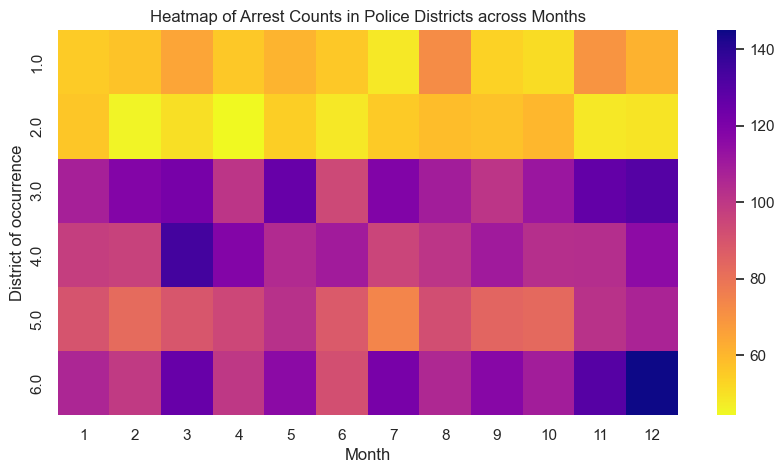

In [153]:
plt.figure(figsize = (10,5))
ax = sns.heatmap(normalized_district_month.T, cmap = 'plasma_r', cbar = True)


#highlight the hottest time of year for arrests and across hottest districts (change based on what you want to see with the commented out code)
# ax.add_patch(plt.Rectangle((0, 2), 6, 3, fill=False, edgecolor = 'green', lw = 3)) #highlight district 3,4,5 for JAN to JUN
# ax.add_patch(plt.Rectangle((0, 2), 12, 2, fill=False, edgecolor = 'green', lw = 3)) #highlight distrct 3 and 4

plt.title('Heatmap of Arrest Counts in Police Districts across Months')
plt.show()

In [155]:
df["age_group"] = df["Subject\'s age"].apply(lambda x: "Juvenile" if x>=10 and x<18 
                                                   else ("Young Adult" if x>=18 and x<30 
                                                         else("Adult" if x>=30 and x<60 else "Senior Citizens")))
df["race"] = df["Subject\'s race"].apply(lambda x: "Asian" if x == "Asian"
                                                   else ("Black/African American " if x=="Black/African American"
                                                         else("White" if x=="White" else "Others")))

In [157]:
df.head()

,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time,Year,Month,Month Name,Day of Week,Hour,age_group,race
0,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,2021-01-01 01:07:00,2021,1,January,4,1,Adult,Asian
1,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,2021,1,January,4,0,Young Adult,Black/African American
2,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,2021,1,January,4,0,Young Adult,Black/African American
3,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,2021,1,January,4,0,Young Adult,Black/African American
4,White,Female,38,HISPANIC,4.0,0,TOD,FSB,2021-01-01 03:00:00,2021,1,January,4,3,Adult,White


In [159]:
df_racexb = pd.crosstab(df["Subject's race"], df["Assigned Bureau"])/pd.crosstab(df["Subject's race"], df["Assigned Bureau"]).sum()*100
df_racexb

Assigned Bureau,FSB,ISB,MSB,PSB
Subject's race,,,,
American Indian/ALSK Natv,0.358938,0.287770,0.000000,0.116880
Asian,3.302225,8.633094,1.867220,2.472933
Black/African American,34.960517,43.741007,65.352697,52.762057
Hawaiian/Pacific Islander,0.000000,0.000000,0.000000,0.030758
White,61.378320,47.338129,32.780083,44.617372


In [161]:
df_agexb = pd.crosstab(df["age_group"], df["Assigned Bureau"])/pd.crosstab(df["age_group"], df["Assigned Bureau"]).sum()*100
df_agexb

Assigned Bureau,FSB,ISB,MSB,PSB
age_group,,,,
Adult,44.795406,46.618705,18.879668,47.434793
Juvenile,23.833453,9.784173,30.912863,11.847933
Senior Citizens,2.584350,6.043165,1.659751,3.420276
Young Adult,28.786791,37.553957,48.547718,37.296998


In [163]:
df_agexb.columns

Index(['FSB', 'ISB', 'MSB', 'PSB'], dtype='object', name='Assigned Bureau')

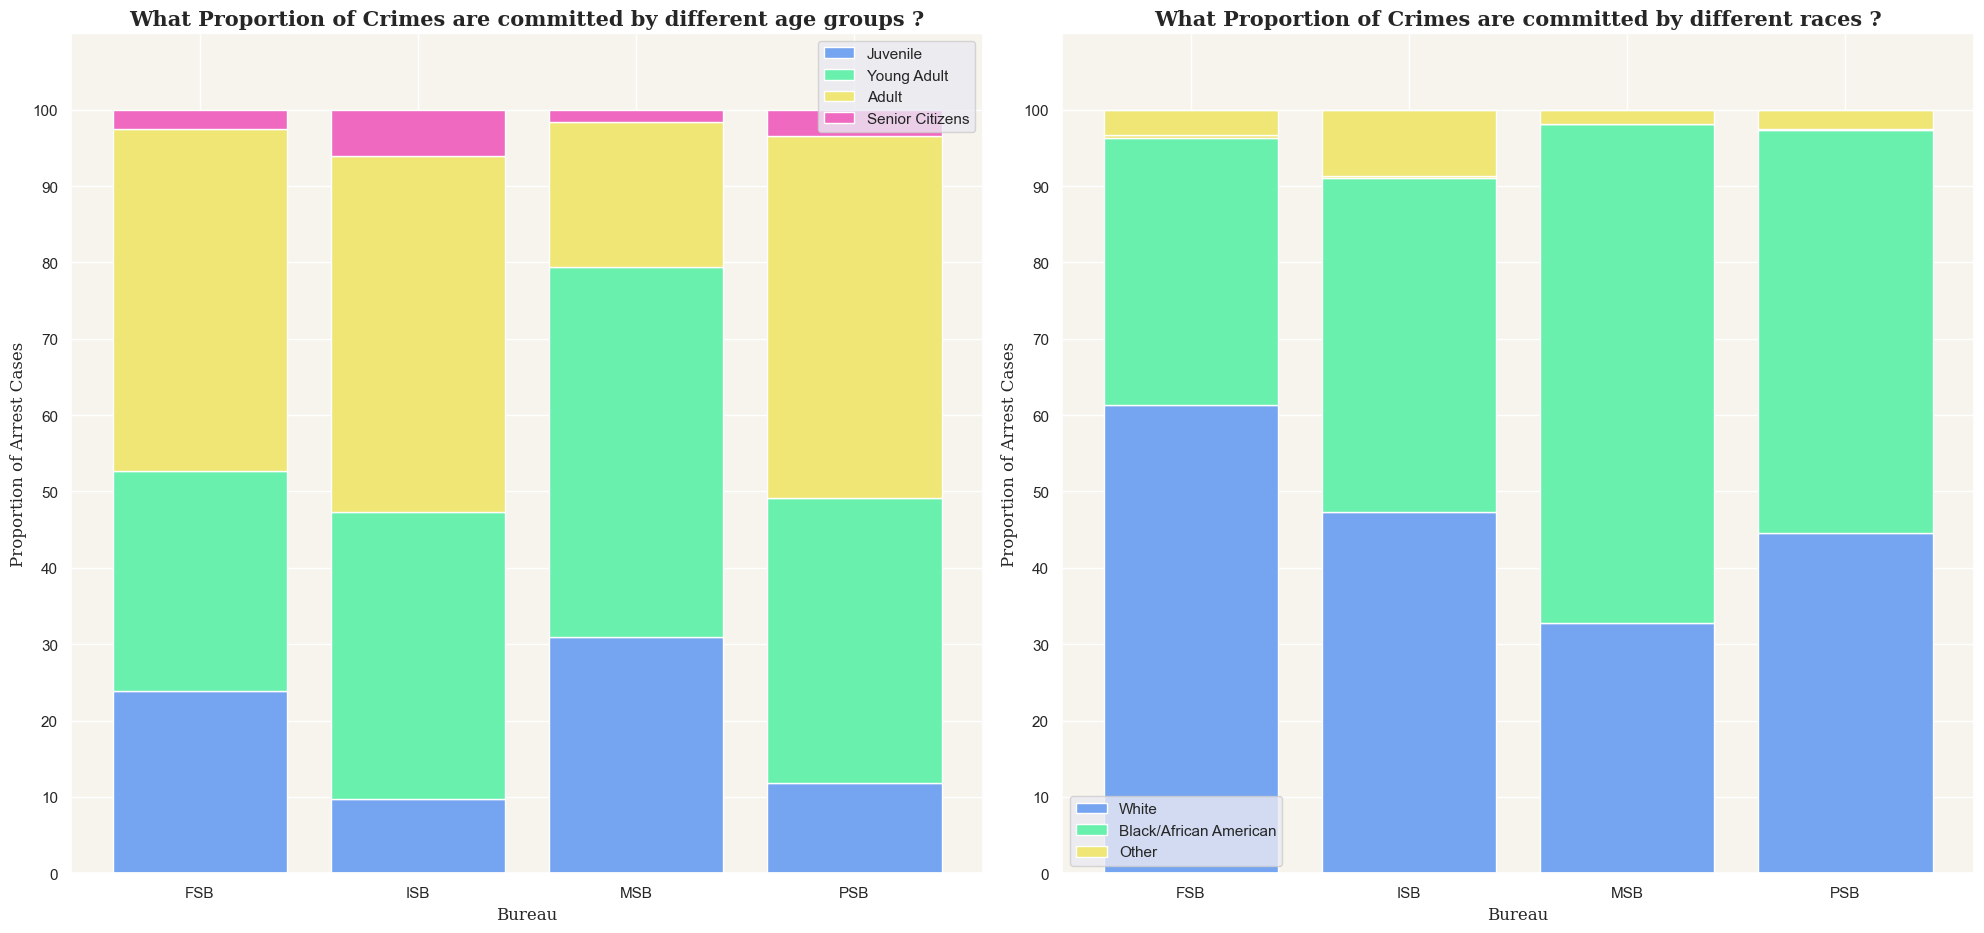

In [165]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].bar(list(df_agexb.columns), df_agexb.iloc[1], label="Juvenile", color="#75a4f0")
ax[0].bar(list(df_agexb.columns), df_agexb.iloc[3], bottom = df_agexb.iloc[1], label="Young Adult", color="#69f0ad")
ax[0].bar(list(df_agexb.columns), df_agexb.iloc[0], bottom = df_agexb.iloc[1]+df_agexb.iloc[3] ,label="Adult", color="#f0e675")
ax[0].bar(list(df_agexb.columns), df_agexb.iloc[2],bottom = df_agexb.iloc[1]+df_agexb.iloc[3] + df_agexb.iloc[0], label="Senior Citizens", color="#f069c1")
ax[0].set_title("What Proportion of Crimes are committed by different age groups ?", fontname="Serif", fontsize=15, weight="bold")
ax[0].set_xlabel("Bureau", fontname="Serif", fontsize=12)
ax[0].set_ylabel("Proportion of Arrest Cases", fontname="Serif", fontsize=12)
ax[0].patch.set_facecolor('#f7f4ed')
ax[0].set_yticks(range(0,120,10))
ax[0].set_yticklabels(["0", "10","20", "30", "40", "50", "60", "70", "80", "90", "100", None])
ax[0].legend()
ax[1].bar(list(df_racexb.columns), df_racexb.iloc[4], label="White", color="#75a4f0")
ax[1].bar(list(df_racexb.columns), df_racexb.iloc[2], bottom = df_racexb.iloc[4], label="Black/African American", color="#69f0ad")
ax[1].bar(list(df_racexb.columns), df_racexb.iloc[0], bottom = df_racexb.iloc[4]+df_racexb.iloc[2] ,label="Other", color="#f0e675")
ax[1].bar(list(df_racexb.columns), df_racexb.iloc[1],bottom = df_racexb.iloc[4]+df_racexb.iloc[2] + df_racexb.iloc[0], color="#f0e675")
ax[1].bar(list(df_racexb.columns), df_racexb.iloc[3],bottom = df_racexb.iloc[4]+df_racexb.iloc[2] + df_racexb.iloc[0]+df_racexb.iloc[1], color="#f0e675")
ax[1].set_title("What Proportion of Crimes are committed by different races ?", fontname="Serif", fontsize=15, weight="bold")
ax[1].set_xlabel("Bureau", fontname="Serif", fontsize=12)
ax[1].set_ylabel("Proportion of Arrest Cases", fontname="Serif", fontsize=12)
ax[1].set_yticks(range(0,120,10))
ax[1].set_yticklabels(["0", "10","20", "30", "40", "50", "60", "70", "80", "90", "100", None])
ax[1].patch.set_facecolor('#f7f4ed')
ax[1].legend()
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<div class="alert alert-block alert-info">

### Study of Safety and Security near School

In [167]:
# District wise study of arrest cases
for i in range(1,7):
    print("District", i)
    print(pd.crosstab(df[df["District of occurrence"]==i]["Adjacent to School"], df[df["District of occurrence"]==i]["Assigned Bureau"]).iloc[1])
    print("\n")

District 1
Assigned Bureau
FSB    36
ISB     4
MSB     6
PSB    66
Name: 1, dtype: int64


District 2
Assigned Bureau
FSB     12
ISB      7
MSB      5
PSB    223
Name: 1, dtype: int64


District 3
Assigned Bureau
FSB     86
ISB      9
MSB      4
PSB    358
Name: 1, dtype: int64


District 4
Assigned Bureau
FSB     97
ISB      3
MSB      3
PSB    187
Name: 1, dtype: int64


District 5
Assigned Bureau
FSB     63
ISB      4
MSB      0
PSB    163
Name: 1, dtype: int64


District 6
Assigned Bureau
FSB     38
ISB      6
MSB      2
PSB    134
Name: 1, dtype: int64




In [169]:
def District_x_School_x_Bureau_table(district, df):
    table = pd.DataFrame(df[(df["District of occurrence"]==district) & (df["Adjacent to School"]==1)].groupby(["Assigned Bureau"]).count()["Ethnicity"])
    table["Total Cases"] = [df[(df["District of occurrence"]==district) & (df["Assigned Bureau"]==bureau)].count()[0] for bureau in list(table.index) ]
    table.rename(columns={'Ethnicity': 'Cases near School'}, inplace=True)
    table["Cases Far From School"] = table["Total Cases"]-table["Cases near School"]
    table["Proportion far from school"] = table["Cases Far From School"]/table["Total Cases"]*100
    table["Proportion near school"] = table["Cases near School"]/table["Total Cases"]*100
    return table

In [171]:
df_1 = District_x_School_x_Bureau_table(1 ,df)
df_2 = District_x_School_x_Bureau_table(2 ,df)
df_3 = District_x_School_x_Bureau_table(3 ,df)
df_4 = District_x_School_x_Bureau_table(4 ,df)
df_5 = District_x_School_x_Bureau_table(5 ,df)
df_6 = District_x_School_x_Bureau_table(6 ,df)
df_5

,Cases near School,Total Cases,Cases Far From School,Proportion far from school,Proportion near school
Assigned Bureau,,,,,
FSB,63,185,122,65.945946,34.054054
ISB,4,83,79,95.180723,4.819277
PSB,163,3465,3302,95.295815,4.704185


In [173]:
new_row = pd.Series({
    'Cases near School': 0.0,
    'Total Cases': 0,
    'Cases Far From School': 0,
    'Proportion far from school': 0.0,
    'Proportion near school': 0.0
}, name='MSB')
index_isb = df_5.index.get_loc('ISB')
df_5 = pd.DataFrame(pd.concat([df_5.iloc[:index_isb + 1], new_row.to_frame().T, df_5.iloc[index_isb + 1:]]))

df_5

,Cases near School,Total Cases,Cases Far From School,Proportion far from school,Proportion near school
FSB,63.0,185.0,122.0,65.945946,34.054054
ISB,4.0,83.0,79.0,95.180723,4.819277
MSB,0.0,0.0,0.0,0.000000,0.000000
PSB,163.0,3465.0,3302.0,95.295815,4.704185


In [175]:
dfs = [df_1, df_2, df_3, df_4, df_5, df_6]
for i in range(len(dfs)):
    print("District: ", i+1)
    print(dfs[i])
    print("\n")

District:  1
                 Cases near School  Total Cases  Cases Far From School  \
Assigned Bureau                                                          
FSB                             36          115                     79   
ISB                              4          182                    178   
MSB                              6           71                     65   
PSB                             66          820                    754   

                 Proportion far from school  Proportion near school  
Assigned Bureau                                                      
FSB                               68.695652               31.304348  
ISB                               97.802198                2.197802  
MSB                               91.549296                8.450704  
PSB                               91.951220                8.048780  


District:  2
                 Cases near School  Total Cases  Cases Far From School  \
Assigned Bureau                  

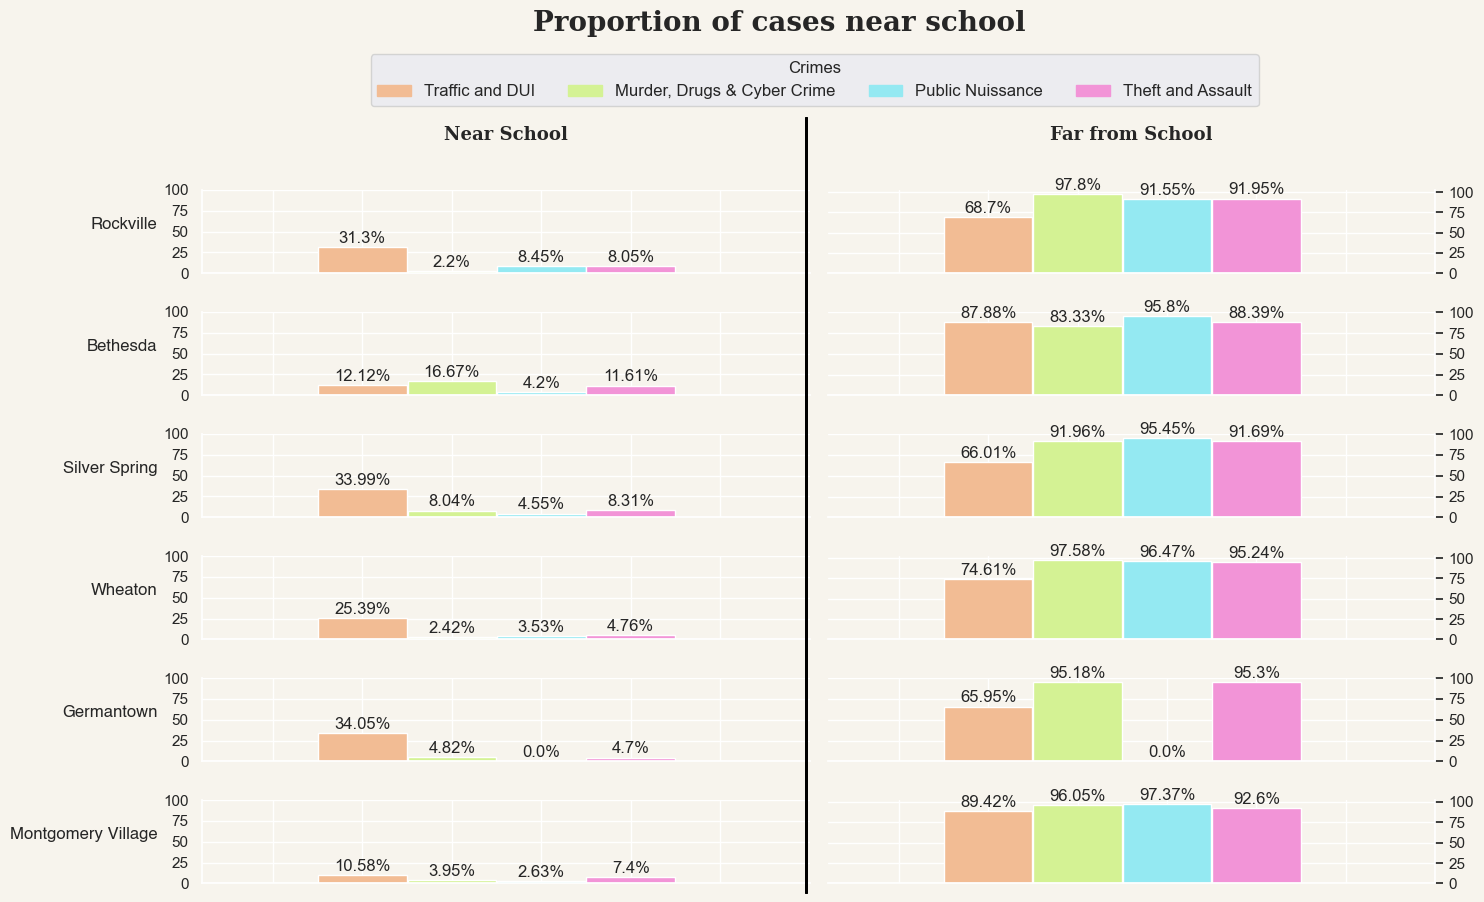

In [177]:
fig, ax = plt.subplots(6,2,figsize=(15,9))
fig.patch.set_facecolor('#f7f4ed')
c = ["white", "white", "#f2bc94", "#d4f294", "#94e9f2", "#f294d7", "white", "white"]
label = ["None", "None", "FSB", "ISB", "MSB", "PSB", "None", " None"]
districts = ["Rockville", "Bethesda", "Silver Spring", "Wheaton", "Germantown", "Montgomery Village"]
legend_dict = {
    'Traffic and DUI': '#f2bc94',
    'Murder, Drugs & Cyber Crime': '#d4f294',
    'Public Nuissance': '#94e9f2',
    'Theft and Assault': '#f294d7'
}
dfs = [df_1, df_2, df_3, df_4, df_5, df_6]
w=0.99
ax[0,0].bar(label, [0,0]+ list(df_1["Proportion near school"])+[0,0], color=c, width = w)
ax[0,1].bar(label, [0,0]+list(df_1["Proportion far from school"])+[0,0], color=c, width = w)
ax[1,0].bar(label, [0,0]+ list(df_2["Proportion near school"])+[0,0], color=c, width = w)
ax[1,1].bar(label, [0,0]+list(df_2["Proportion far from school"])+[0,0], color=c, width = w)
ax[2,0].bar(label, [0,0]+ list(df_3["Proportion near school"])+[0,0], color=c, width = w)
ax[2,1].bar(label, [0,0]+list(df_3["Proportion far from school"])+[0,0], color=c, width = w)
ax[3,0].bar(label, [0,0]+ list(df_4["Proportion near school"])+[0,0], color=c, width = w)
ax[3,1].bar(label, [0,0]+list(df_4["Proportion far from school"])+[0,0], color=c, width = w)
ax[4,0].bar(label, [0,0]+ list(df_5["Proportion near school"])+[0,0], color=c, width = w)
ax[4,1].bar(label, [0,0]+list(df_5["Proportion far from school"])+[0,0], color=c, width = w)
ax[5,0].bar(label, [0,0]+ list(df_6["Proportion near school"])+[0,0], color=c, width = w)
ax[5,1].bar(label, [0,0]+list(df_6["Proportion far from school"])+[0,0], color=c, width = w)

for i in range(0,6):
    for j in range(0,2):
        ax[i,j].set_yticks([0, 25, 50, 75, 100])
        ax[i,j].set_xticks(range(7))
        # ax[i,j].set_xticklabels([ None, "FSB", "ISB", "MSB", "PSB", None, None])
        ax[i,j].tick_params(axis='x', which="both", bottom = False, top=False, labelbottom=False)
        ax[i,0].set_ylabel(districts[i], rotation=0, horizontalalignment="right", weight="bold", fontname="Helvetica")
        ax[i,j].spines["top"].set_visible(False)
        ax[i,0].spines["right"].set_visible(False)
        ax[i,1].spines["left"].set_visible(False)
        ax[i,1].set_yticks([])
        ax[i,j].patch.set_facecolor('#f7f4ed')
        if j == 1:
            ax[i, j].yaxis.set_label_position("right")
            ax[i, j].yaxis.tick_right()
            ax[i,j].set_yticks([0, 25, 50, 75, 100])
        
for i in range(6):
    for k in range(4):
        ax[i,0].text(k+1, dfs[i].iloc[k,4]+5, str(round(dfs[i].iloc[k,4],2))+"%", ha="center")
        ax[i,1].text(k+1, dfs[i].iloc[k,3]+5, str(round(dfs[i].iloc[k,3],2))+"%", ha="center")
for i in range(6):
    # line = mlines.Line2D(xdata=[0.53245, 0.53245], ydata=[0.02, 0.88], color='black', linewidth=2, transform=fig.transFigure, figure=fig)
    # line = mlines.Line2D(xdata=[0.52, 0.52], ydata=[0.02, 0.88], color='black', linewidth=2, transform=fig.transFigure, figure=fig)
    line = mlines.Line2D(xdata=[0.5425, 0.5425], ydata=[0.02, 0.88], color='black', linewidth=2, transform=fig.transFigure, figure=fig)
    fig.add_artist(line)
plt.suptitle("Proportion of cases near school", horizontalalignment="center", weight="bold", x=0.525, y=1, fontsize=20, fontname="Serif")
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_dict.values()]
labels = list(legend_dict.keys())
fig.legend(handles, labels, loc='upper right', ncol=4, bbox_to_anchor=(0.85, 0.96), fontsize=12, title='Crimes')
ax[0,0].set_title("Near School", y=1.5, weight="bold", fontsize=13, fontname="Serif")
ax[0,1].set_title("Far from School", y=1.5, weight="bold", fontsize=13, fontname="Serif")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<div class="alert alert-block alert-info">

### Analyzing and Studying Patterns and Relationships across Type of Crime, Gender, Age and Race

In [179]:
df_group_bureau_gender = pd.DataFrame(df.groupby(["Assigned Bureau", "Subject's gender", "Subject's race"]).count())

In [181]:
df_group_bureau_gender

Subject's age  \
Assigned Bureau Subject's gender Subject's race                             
FSB             Female           American Indian/ALSK Natv              3   
                                 Asian                                  7   
                                 Black/African American               128   
                                 White                                201   
                Male             American Indian/ALSK Natv              2   
                                 Asian                                 39   
                                 Black/African American               359   
                                 White                                654   
ISB             Female           American Indian/ALSK Natv              1   
                                 Asian                                 29   
                                 Black/African American                27   
                                 White                                 47   
                Male             American Indian/ALSK Natv              1   
                                 Asian                                 31   
                                 Black/African American               277   
                                 White                                282   
MSB             Female           Asian                                  3   
                                 Black/African American                29   
                                 White                                 27   
                Male             Asian                                  6   
                                 Black/African American               286   
                                 White                                131   
PSB             Female           American Indian/ALSK Natv              6   
                                 Asian                                100   
                                 Black/African American              1831   
                                 Hawaiian/Pacific Islander              1   
                                 White                               1641   
                Male             American Indian/ALSK Natv             13   
                                 Asian                                302   
                                 Black/African American              6746   
                                 Hawaiian/Pacific Islander              4   
                                 White                               5612   

                                                            Ethnicity  \
Assigned Bureau Subject's gender Subject's race                         
FSB             Female           American Indian/ALSK Natv          3   
                                 Asian                              7   
                                 Black/African American           128   
                                 White                            201   
                Male             American Indian/ALSK Natv          2   
                                 Asian                             39   
                                 Black/African American           359   
                                 White                            654   
ISB             Female           American Indian/ALSK Natv          1   
                                 Asian                             29   
                                 Black/African American            27   
                                 White                             47   
                Male             American Indian/ALSK Natv          1   
                                 Asian                             31   
                                 Black/African American           277   
                                 White                            282   
MSB             Female           Asian                              3   
                                 Black/African America

In [183]:
age_categories = list(df["age_group"].unique())
for i in age_categories:
    df_filter_age = df[(df["age_group"]==i)].copy()
    print("Age Group :", i)
    print("\n")
    print(round(pd.crosstab(df_filter_age["race"], df_filter_age["Assigned Bureau"])/pd.crosstab(df_filter_age["race"], df_filter_age["Assigned Bureau"]).sum(axis=0)*100,2))
    print("\n \n")

Age Group : Adult


Assigned Bureau            FSB    ISB    MSB    PSB
race                                               
Asian                     3.53  12.96   1.10   3.07
Black/African American   27.40  38.27  73.63  50.68
Others                    0.16   0.31   0.00   0.16
White                    68.91  48.46  25.27  46.09

 

Age Group : Young Adult


Assigned Bureau            FSB    ISB    MSB    PSB
race                                               
Asian                     3.74   2.30   2.14   1.85
Black/African American   28.68  52.87  70.94  54.41
Others                    0.75   0.00   0.00   0.16
White                    66.83  44.83  26.92  43.58

 

Age Group : Juvenile


Assigned Bureau            FSB   ISB    MSB    PSB
race                                              
Asian                     2.11   0.0   2.01   1.35
Black/African American   56.93  50.0  53.02  57.79
Others                    0.30   0.0   0.00   0.05
White                    40.66  50.0  44.97 

In [185]:
df_filter_age_adult = df[(df["age_group"]=="Adult")].copy()
df_adult = round(pd.crosstab(df_filter_age_adult["race"], df_filter_age_adult["Assigned Bureau"])/pd.crosstab(df_filter_age_adult["race"], df_filter_age_adult["Assigned Bureau"]).sum(axis=0)*100,2)
df_filter_age_juv = df[(df["age_group"]=="Juvenile")].copy()
df_juv = round(pd.crosstab(df_filter_age_juv["race"], df_filter_age_juv["Assigned Bureau"])/pd.crosstab(df_filter_age_juv["race"], df_filter_age_juv["Assigned Bureau"]).sum(axis=0)*100,2)
df_filter_age_ya = df[(df["age_group"]=="Young Adult")].copy()
df_ya = round(pd.crosstab(df_filter_age_ya["race"], df_filter_age_ya["Assigned Bureau"])/pd.crosstab(df_filter_age_ya["race"], df_filter_age_ya["Assigned Bureau"]).sum(axis=0)*100,2)
df_filter_age_sc = df[(df["age_group"]=="Senior Citizens")].copy()
df_sc = round(pd.crosstab(df_filter_age_sc["race"], df_filter_age_sc["Assigned Bureau"])/pd.crosstab(df_filter_age_sc["race"], df_filter_age_sc["Assigned Bureau"]).sum(axis=0)*100,2)
bureaus = list(df_ya.columns)
x = np.linspace(1,4,4)
df_adult

Assigned Bureau,FSB,ISB,MSB,PSB
race,,,,
Asian,3.53,12.96,1.10,3.07
Black/African American,27.40,38.27,73.63,50.68
Others,0.16,0.31,0.00,0.16
White,68.91,48.46,25.27,46.09


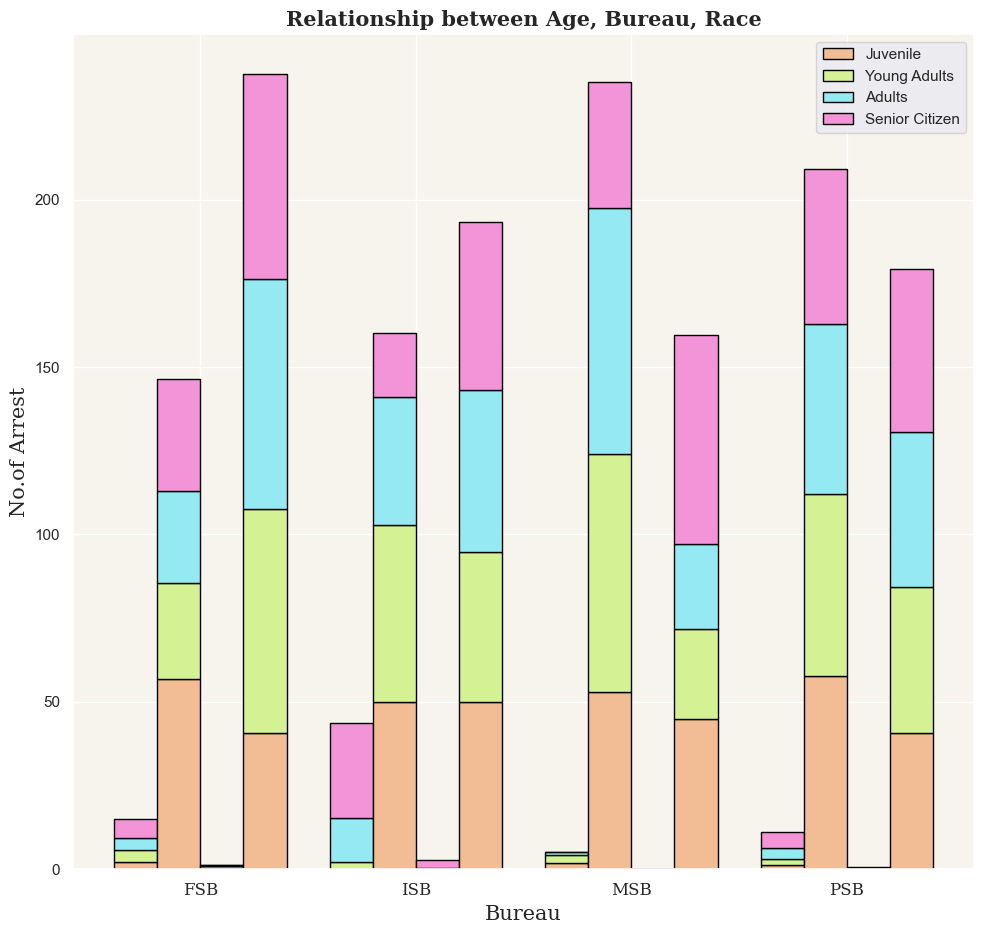

In [187]:
fig, ax = plt.subplots(figsize=(10,10))
w=0.2
c = ["#f2bc94", "#d4f294", "#94e9f2", "#f294d7"]
ax.bar(x-w*1.5, df_juv.iloc[0,:], width=0.2, label="Juvenile", color=c[0], edgecolor="black")
ax.bar(x-w*1.5, df_ya.iloc[0,:], width=0.2, bottom = df_juv.iloc[0,:],label="Young Adults",color=c[1], edgecolor="black")
ax.bar(x-w*1.5, df_adult.iloc[0,:], width=0.2,bottom = df_juv.iloc[0,:]+df_ya.iloc[0,:] ,label="Adults", color=c[2], edgecolor="black")
ax.bar(x-w*1.5, df_sc.iloc[0,:], width=0.2, bottom = df_juv.iloc[0,:]+df_ya.iloc[0,:]+df_adult.iloc[0,:],label="Senior Citizen", color=c[3], edgecolor="black")
ax.bar(x-w*0.5, df_juv.iloc[1,:], width=0.2, color = c[0], edgecolor="black")
ax.bar(x-w*0.5, df_ya.iloc[1,:], width=0.2, bottom = df_juv.iloc[1,:], color=c[1], edgecolor="black")
ax.bar(x-w*0.5, df_adult.iloc[1,:], width=0.2,bottom = df_juv.iloc[1,:]+df_ya.iloc[1,:] , color=c[2], edgecolor="black")
ax.bar(x-w*0.5, df_sc.iloc[1,:], width=0.2, bottom = df_juv.iloc[1,:]+df_ya.iloc[1,:]+df_adult.iloc[1,:], color=c[3], edgecolor="black")
ax.bar(x+w*0.5, df_juv.iloc[2,:], width=0.2, color = c[0], edgecolor="black")
ax.bar(x+w*0.5, df_ya.iloc[2,:], width=0.2, bottom = df_juv.iloc[2,:], color=c[1], edgecolor="black")
ax.bar(x+w*0.5, df_adult.iloc[2,:], width=0.2,bottom = df_juv.iloc[2,:]+df_ya.iloc[2,:] , color=c[2], edgecolor="black")
ax.bar(x+w*0.5, df_sc.iloc[2,:], width=0.2, bottom = df_juv.iloc[2,:]+df_ya.iloc[2,:]+df_adult.iloc[2,:], color=c[3], edgecolor="black")
ax.bar(x+w*1.5, df_juv.iloc[3,:], width=0.2, color = c[0], edgecolor="black")
ax.bar(x+w*1.5, df_ya.iloc[3,:], width=0.2, bottom = df_juv.iloc[3,:], color=c[1], edgecolor="black")
ax.bar(x+w*1.5, df_adult.iloc[3,:], width=0.2,bottom = df_juv.iloc[3,:]+df_ya.iloc[3,:] , color=c[2], edgecolor="black")
ax.bar(x+w*1.5, df_sc.iloc[3,:], width=0.2, bottom = df_juv.iloc[3,:]+df_ya.iloc[3,:]+df_adult.iloc[3,:], color=c[3], edgecolor="black")
ax.set_xticks(range(1,5))
ax.set_xticklabels(bureaus, fontname="serif", fontsize=12)
ax.set_yticklabels([0,50,100,150,200,250])
ax.set_xlabel("Bureau", fontname="serif", fontsize=15)
ax.set_ylabel("No.of Arrest", fontname="serif", fontsize=15)
ax.patch.set_facecolor('#f7f4ed')
ax.set_title("Relationship between Age, Bureau, Race", fontname="serif", fontsize=15, weight="bold")
#fig.patch.set_facecolor('#f7f4ed')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.legend()
plt.show()

In [189]:
df_filter_age_adult = df[(df["age_group"]=="Adult")].copy()
df_adult = round(pd.crosstab(df_filter_age_adult["Assigned Bureau"], df_filter_age_adult["race"])/pd.crosstab(df_filter_age_adult["Assigned Bureau"], df_filter_age_adult["race"]).sum(axis=0)*100,2)
df_filter_age_juv = df[(df["age_group"]=="Juvenile")].copy()
df_juv = round(pd.crosstab(df_filter_age_juv["Assigned Bureau"], df_filter_age_juv["race"])/pd.crosstab(df_filter_age_juv["Assigned Bureau"], df_filter_age_juv["race"]).sum(axis=0)*100,2)
df_filter_age_ya = df[(df["age_group"]=="Young Adult")].copy()
df_ya = round(pd.crosstab(df_filter_age_ya["Assigned Bureau"], df_filter_age_ya["race"])/pd.crosstab(df_filter_age_ya["Assigned Bureau"], df_filter_age_ya["race"]).sum(axis=0)*100,2)
df_filter_age_sc = df[(df["age_group"]=="Senior Citizens")].copy()
df_sc = round(pd.crosstab(df_filter_age_sc["Assigned Bureau"], df_filter_age_sc["race"])/pd.crosstab(df_filter_age_sc["Assigned Bureau"], df_filter_age_sc["race"]).sum(axis=0)*100,2)
bureaus = list(df_ya.columns)
x = np.linspace(1,4,4)
df_adult

race,Asian,Black/African American,Others,White
Assigned Bureau,,,,
FSB,7.28,4.00,7.14,10.33
ISB,13.91,2.90,7.14,3.77
MSB,0.33,1.57,0.00,0.55
PSB,78.48,91.52,85.71,85.35


In [191]:
df_fsb = pd.crosstab(df[df["race"]=="Asian"]["age_group"], df[df["race"]=="Asian"]["Assigned Bureau"])
df_isb = pd.crosstab(df[df["race"]=="Black/African American "]["age_group"], df[df["race"]=="Black/African American "]["Assigned Bureau"])
df_msb = pd.crosstab(df[df["race"]=="Others"]["age_group"], df[df["race"]=="Others"]["Assigned Bureau"])
df_psb = pd.crosstab(df[df["race"]=="White"]["age_group"], df[df["race"]=="White"]["Assigned Bureau"])
df_msb["MSB"] = 0
df_msb = df_msb[["FSB", "ISB", "MSB", "PSB"]]
df_msb

Assigned Bureau,FSB,ISB,MSB,PSB
age_group,,,,
Adult,1,1,0,12
Juvenile,1,0,0,1
Senior Citizens,0,1,0,1
Young Adult,3,0,0,10


In [193]:
dfss=[df_fsb, df_isb, df_msb, df_psb]
race=["Asian", "Black", "Other", "White"]

In [195]:
for i in range(4):
    print(race[i])
    print(dfss[i])
    print("\n")

Asian
Assigned Bureau  FSB  ISB  MSB  PSB
age_group                          
Adult             22   42    1  237
Juvenile           7    0    3   26
Senior Citizens    2   12    0   27
Young Adult       15    6    5  112


Black
Assigned Bureau  FSB  ISB  MSB   PSB
age_group                           
Adult            171  124   67  3908
Juvenile         189   34   79  1113
Senior Citizens   12    8    3   257
Young Adult      115  138  166  3299


Other
Assigned Bureau  FSB  ISB  MSB  PSB
age_group                          
Adult              1    1    0   12
Juvenile           1    0    0    1
Senior Citizens    0    1    0    1
Young Adult        3    0    0   10


White
Assigned Bureau  FSB  ISB  MSB   PSB
age_group                           
Adult            430  157   23  3554
Juvenile         135   34   67   786
Senior Citizens   22   21    5   271
Young Adult      268  117   63  2642




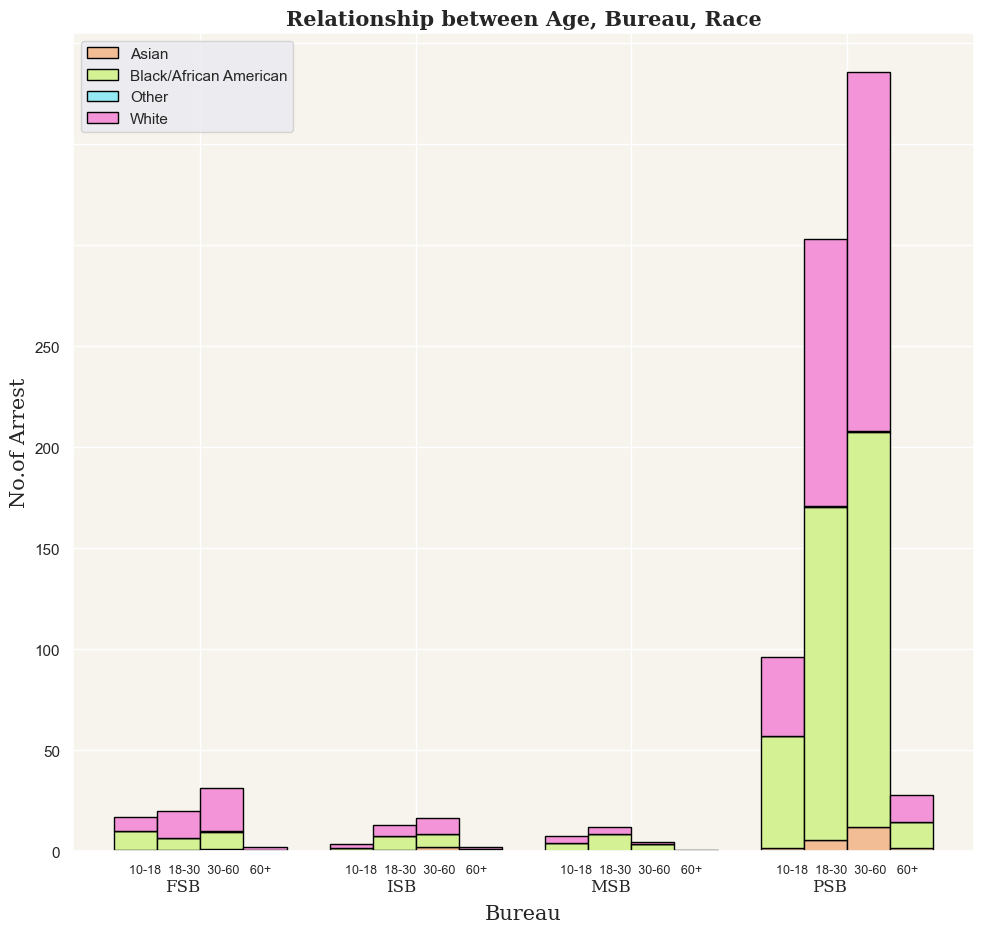

In [197]:
fig, ax = plt.subplots(figsize=(10,10))
w=0.2
c = ["#f2bc94", "#d4f294", "#94e9f2", "#f294d7"]
ax.bar(x-w*1.5, df_fsb.iloc[1,:], width=0.2, label="Asian", color=c[0], edgecolor="black")
ax.bar(x-w*1.5, df_isb.iloc[1,:], width=0.2, bottom = df_fsb.iloc[1,:],label="Black/African American",color=c[1], edgecolor="black")
ax.bar(x-w*1.5, df_msb.iloc[1,:], width=0.2,bottom = df_fsb.iloc[1,:]+df_isb.iloc[1,:] ,label="Other", color=c[2], edgecolor="black")
ax.bar(x-w*1.5, df_psb.iloc[1,:], width=0.2, bottom = df_fsb.iloc[1,:]+df_isb.iloc[1,:]+df_msb.iloc[1,:],label="White", color=c[3], edgecolor="black")
ax.bar(x-w*0.5, df_fsb.iloc[3,:], width=0.2, color = c[0], edgecolor="black")
ax.bar(x-w*0.5, df_isb.iloc[3,:], width=0.2, bottom = df_fsb.iloc[3,:], color=c[1], edgecolor="black")
ax.bar(x-w*0.5, df_msb.iloc[3,:], width=0.2,bottom = df_fsb.iloc[3,:]+df_isb.iloc[3,:] , color=c[2], edgecolor="black")
ax.bar(x-w*0.5, df_psb.iloc[3,:], width=0.2, bottom = df_fsb.iloc[3,:]+df_isb.iloc[3,:]+df_msb.iloc[3,:], color=c[3], edgecolor="black")
ax.bar(x+w*0.5, df_fsb.iloc[0,:], width=0.2, color = c[0], edgecolor="black")
ax.bar(x+w*0.5, df_isb.iloc[0,:], width=0.2, bottom = df_fsb.iloc[0,:], color=c[1], edgecolor="black")
ax.bar(x+w*0.5, df_msb.iloc[0,:], width=0.2,bottom = df_fsb.iloc[0,:]+df_isb.iloc[0,:] , color=c[2], edgecolor="black")
ax.bar(x+w*0.5, df_psb.iloc[0,:], width=0.2, bottom = df_fsb.iloc[0,:]+df_isb.iloc[0,:]+df_msb.iloc[0,:], color=c[3], edgecolor="black")
ax.bar(x+w*1.5, df_fsb.iloc[2,:], width=0.2, color = c[0], edgecolor="black")
ax.bar(x+w*1.5, df_isb.iloc[2,:], width=0.2, bottom = df_fsb.iloc[2,:], color=c[1], edgecolor="black")
ax.bar(x+w*1.5, df_msb.iloc[2,:], width=0.2,bottom = df_fsb.iloc[2,:]+df_isb.iloc[2,:] , color=c[2], edgecolor="black")
ax.bar(x+w*1.5, df_psb.iloc[2,:], width=0.2, bottom = df_fsb.iloc[2,:]+df_isb.iloc[2,:]+df_msb.iloc[2,:], color=c[3], edgecolor="black")
ax.set_xticks(range(1,5))
ax.set_xticklabels(["10-18  18-30  30-60   60+", "10-18  18-30  30-60   60+", "10-18  18-30  30-60   60+", "10-18  18-30  30-60   60+"], fontsize=9)
# ax.set_xticklabels(["FSB", "ISB", "MSB", "PSB"], fontname="serif", fontsize=12)
ax.set_yticklabels([0,50,100,150,200,250])
ax.set_xlabel("Bureau", fontname="serif", fontsize=15,  labelpad=20)
ax.text(1,-400, "FSB", ha="right", fontsize=12, fontname="Serif")
ax.text(2,-400, "ISB", ha="right", fontsize=12, fontname="Serif")
ax.text(3,-400, "MSB", ha="right", fontsize=12, fontname="Serif")
ax.text(4,-400, "PSB", ha="right", fontsize=12, fontname="Serif")
ax.set_ylabel("No.of Arrest", fontname="serif", fontsize=15)
ax.patch.set_facecolor('#f7f4ed')
ax.set_title("Relationship between Age, Bureau, Race", fontname="serif", fontsize=15, weight="bold")
#fig.patch.set_facecolor('#f7f4ed')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    
### Understanding Crime Trends - Timeseries Analysis

In [199]:
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_tab = pd.crosstab(index=df_f['Month'], columns='counts')

month_counts = df_f.groupby(['Year', 'Month']).size().unstack(fill_value=0)

years_per_month = (month_counts > 0).sum()

total_arrests = month_counts.sum()

average_arrests = total_arrests / years_per_month

average_arrests = average_arrests.reindex(range(1, 13))

average_arrests

Month
1     513.500000
2     498.500000
3     586.000000
4     513.500000
5     563.750000
6     487.750000
7     511.666667
8     538.000000
9     523.000000
10    518.333333
11    580.000000
12    608.666667
dtype: float64

In [201]:
hours = sorted(df_f['Hour'].unique())
hour_tab = pd.crosstab(index=df_f['Hour'], columns='counts')

day_names = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]
day_tab = pd.crosstab(index=df_f['Day of Week'], columns='counts')

In [203]:
peakest_hour_index = hour_tab['counts'].idxmax()
peakest_hour_value = hour_tab['counts'].max()
peak_hours = [peakest_hour_index, 16, 17]
peak_hour_data = hour_tab[hour_tab.index.isin(peak_hours)]

peak_hour_data

col_0,counts
Hour,
0,1482
16,1402
17,1380


In [205]:
nonpeakest_hour_index = hour_tab['counts'].idxmin()
nonpeakest_hour_value = hour_tab['counts'].min()
nonpeak_hours = list(range(4,9))
nonpeak_hour_data = hour_tab[hour_tab.index.isin(nonpeak_hours)]

nonpeak_hour_data

col_0,counts
Hour,
4,385
5,263
6,275
7,415
8,447


In [207]:
dates = pd.to_datetime(month_year.index)

X_total = (dates - pd.Timestamp('1970-01-01')) // pd.Timedelta('1D')
X_total = X_total.values.reshape(-1, 1) 

y_total = month_year.values

model = LinearRegression()
model.fit(X_total, y_total)

y_total_pred = model.predict(X_total)

dates_pred = pd.to_datetime(X_total.flatten(), origin='1970-01-01', unit='D')

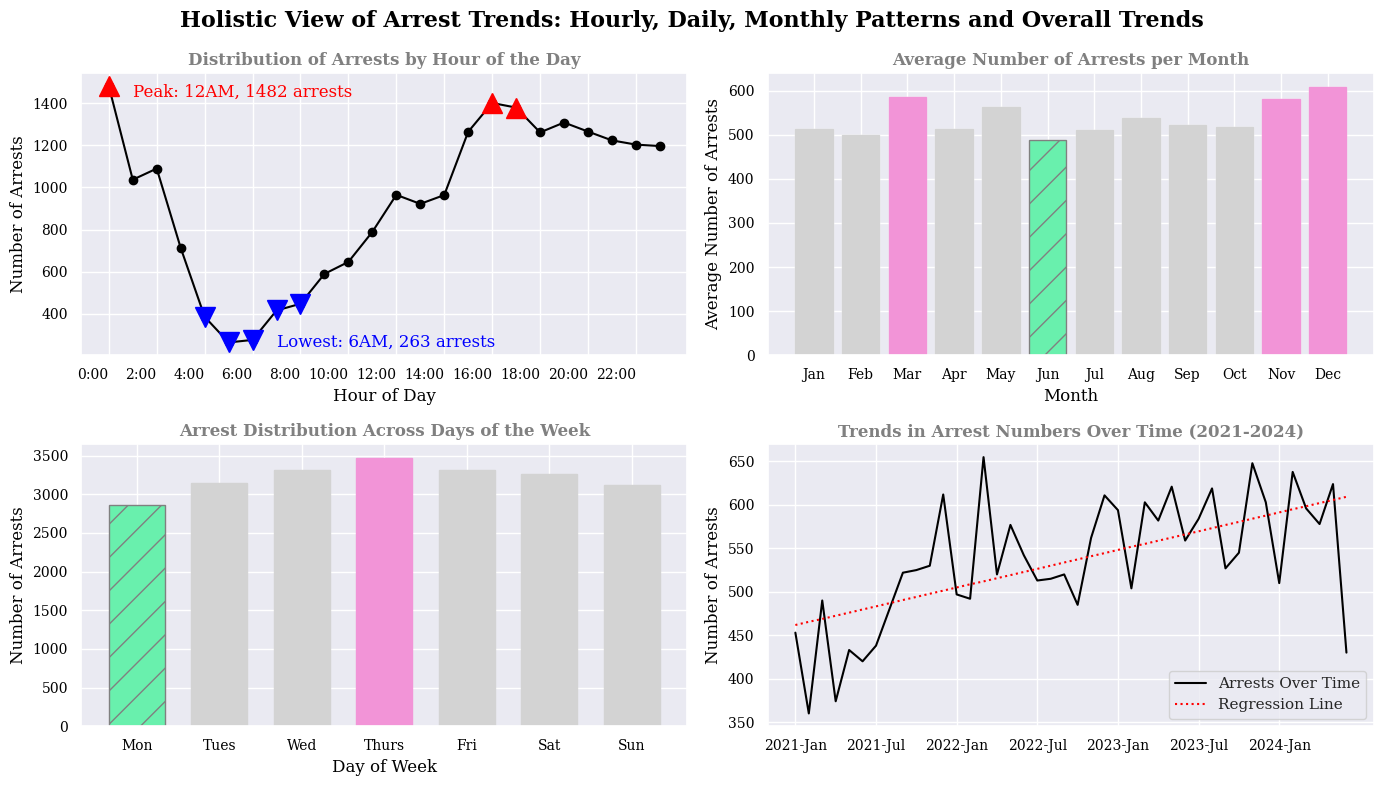

In [209]:
import matplotlib.pyplot as plt

font_title = {'family': 'serif', 'color': 'black', 'weight': 'bold'}
font_sub_title = {'family': 'serif', 'color': 'gray', 'weight': 'bold'}
font_other = {'family': 'serif', 'color': 'black'}
font_serif = {'family': 'serif', 'color': 'black'}

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

axes[0, 0].plot(hour_tab.index, hour_tab['counts'], marker='o', linestyle='-', color='black')
for peak_hour in peak_hours:
    if peak_hour in hour_tab.index:
        peak_hour_value = hour_tab.loc[peak_hour, 'counts']
        axes[0, 0].plot(peak_hour, peak_hour_value, marker='^', markersize=15, color='red', linestyle='')
for nonpeak_hour in nonpeak_hours:
    if nonpeak_hour in hour_tab.index:
        nonpeak_hour_value = hour_tab.loc[nonpeak_hour, 'counts']
        axes[0, 0].plot(nonpeak_hour, nonpeak_hour_value, marker='v', markersize=15, color='blue', linestyle='')

xticks = np.arange(0, 24, 2) 
axes[0, 0].set_xticks(xticks)
axes[0, 0].set_xticklabels([f'{h}:00' for h in xticks], ha='right', **font_other)

axes[0, 0].set_xlabel('Hour of Day', fontdict=font_other)
axes[0, 0].set_ylabel('Number of Arrests', fontdict=font_other)
axes[0, 0].set_title('Distribution of Arrests by Hour of the Day', fontdict=font_sub_title)
axes[0, 0].tick_params(axis='both', labelsize=10, labelcolor='black', labelrotation=0)
for tick in axes[0, 0].get_xticklabels() + axes[0, 0].get_yticklabels():
    tick.set_fontfamily('serif')

axes[0, 0].annotate(
    f'Peak: 12AM, {peakest_hour_value} arrests',
    xy=(peakest_hour_index, peakest_hour_value),
    xytext=(peakest_hour_index + 1, peakest_hour_value - 50),
    fontsize=12,
    color='red',
    fontfamily='serif'
)
axes[0, 0].annotate(
    f'Lowest: 6AM, {nonpeakest_hour_value} arrests',
    xy=(nonpeakest_hour_index, nonpeakest_hour_value),
    xytext=(nonpeakest_hour_index + 2, nonpeakest_hour_value - 20),
    fontsize=12,
    color='blue',
    fontfamily='serif'
)

axes[0, 1].bar(month_names, average_arrests, color='skyblue')
axes[0, 1].set_title('Average Number of Arrests per Month', fontdict=font_sub_title)
axes[0, 1].set_xlabel('Month', fontdict=font_other)
axes[0, 1].set_ylabel('Average Number of Arrests', fontdict=font_other)
axes[0, 1].tick_params(axis='both', labelsize=10, labelcolor='black', labelrotation=0)
for tick in axes[0, 1].get_xticklabels() + axes[0, 1].get_yticklabels():
    tick.set_fontfamily('serif')

bar_plot_month = axes[0, 1].bar(month_names, average_arrests, color='#f294d7')
for i, rect in enumerate(bar_plot_month.patches):
    if i == 11 or i == 10 or i == 2:
        rect.set_color('#f294d7')
    elif i == 5:
        rect.set_color('#69f0ad')
        rect.set_edgecolor('gray')
        rect.set_hatch('/')
    else:
        rect.set_color('lightgrey')

axes[1, 0].set_xlabel('Day of Week', fontdict=font_other)
axes[1, 0].set_ylabel('Number of Arrests', fontdict=font_other)
axes[1, 0].set_title('Arrest Distribution Across Days of the Week', fontdict=font_sub_title)
axes[1, 0].tick_params(axis='both', labelsize=10, labelcolor='black', labelrotation=0)
for tick in axes[1, 0].get_xticklabels() + axes[1, 0].get_yticklabels():
    tick.set_fontfamily('serif')

bar_plot = axes[1, 0].bar(day_names, day_tab['counts'], color='#f294d7', width=0.68)
for i, rect in enumerate(bar_plot.patches):
    if i == 3:
        rect.set_color('#f294d7')
    elif i == 0:
        rect.set_color('#69f0ad')
        rect.set_edgecolor('gray')
        rect.set_hatch('/')
    else:
        rect.set_color('lightgrey')

axes[1, 0].set_xticks(day_names)

axes[1, 1].plot(month_year.index, month_year.values, label='Arrests Over Time', linestyle='-', color='black')
axes[1, 1].plot(month_year.index, y_total_pred, color='red', label='Regression Line', linestyle='dotted')
axes[1, 1].set_title('Trends in Arrest Numbers Over Time (2021-2024)', fontdict=font_sub_title)
axes[1, 1].set_ylabel('Number of Arrests', fontdict=font_other)
axes[1, 1].tick_params(axis='both', labelsize=10, labelcolor='black', labelrotation=0)
for tick in axes[1, 1].get_xticklabels() + axes[1, 1].get_yticklabels():
    tick.set_fontfamily('serif')

tick_labels = month_year.index[::6]
axes[1, 1].set_xticks(tick_labels)
axes[1, 1].legend(loc='lower right', prop={'family': 'serif'})
axes[1, 1].grid(True)

fig.suptitle('Holistic View of Arrest Trends: Hourly, Daily, Monthly Patterns and Overall Trends', fontsize=16, fontdict=font_title, weight='bold')

plt.tight_layout()
plt.show()

In [211]:
arrest_by_district = pd.crosstab(
    index=df_f['Month Year'], 
    columns=df_f['District of occurrence'], 
    values=df_f['Event Date/Time'], 
    aggfunc='count'
)

num_districts = len(arrest_by_district.columns)
rows, cols = (num_districts // 2) + (num_districts % 2 != 0), 2 if num_districts > 2 else 1

arrest_by_district.T

Month Year,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,...,2023-09-01,2023-10-01,2023-11-01,2023-12-01,2024-01-01,2024-02-01,2024-03-01,2024-04-01,2024-05-01,2024-06-01
District of occurrence,,,,,,,,,,,,,,,,,,,,,
1.0,62,48,54,41,58,50,50,71,33,52,...,76,71,85,71,56,86,69,67,91,55
2.0,39,24,61,30,32,28,53,62,60,60,...,60,56,50,55,64,79,52,66,79,59
3.0,94,87,102,68,92,82,83,97,93,109,...,109,120,132,124,99,150,118,112,114,72
4.0,76,58,96,66,85,106,84,74,120,113,...,88,110,117,110,92,121,145,140,122,99
5.0,90,72,72,93,72,68,70,96,94,81,...,68,58,105,92,85,77,72,78,119,73
6.0,92,71,105,76,94,86,98,80,122,110,...,126,130,159,151,114,125,140,115,99,72


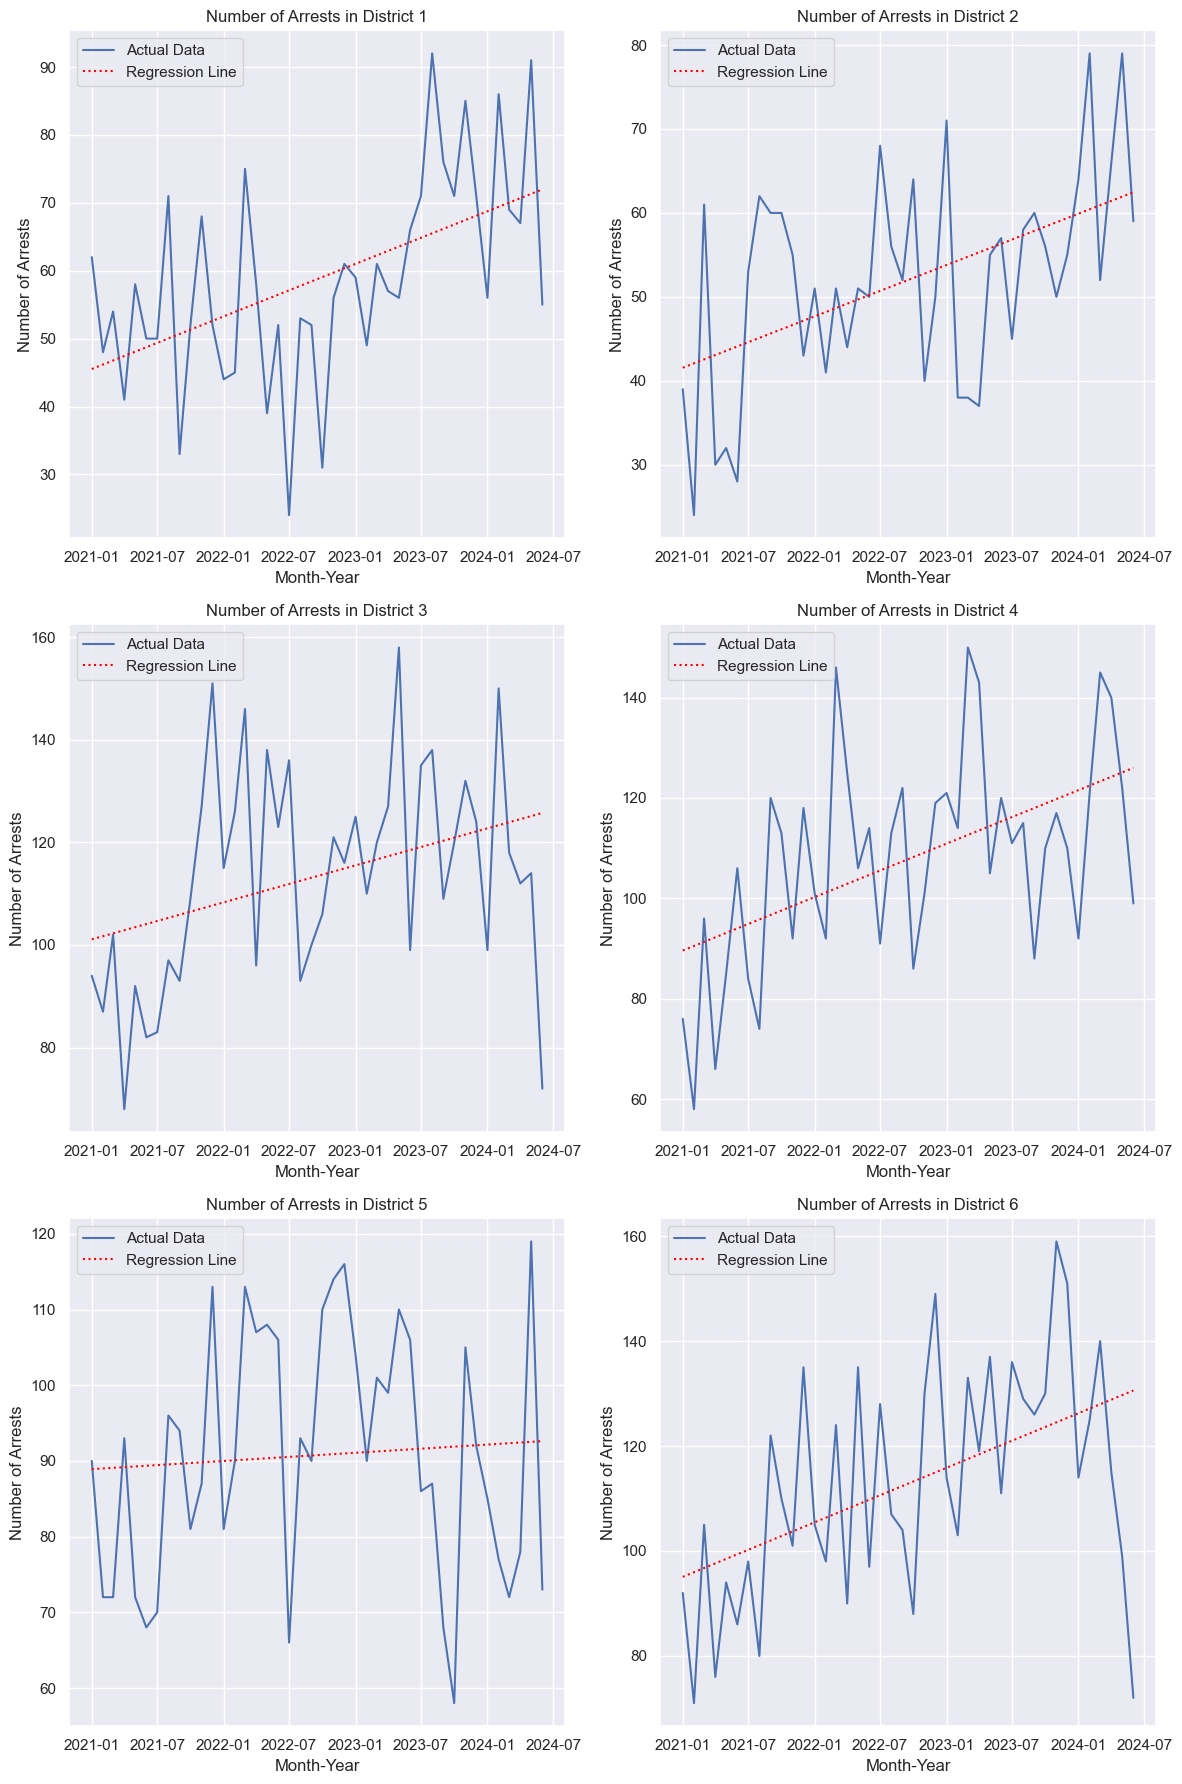

In [213]:
fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))

axes = axes.flatten()

for i, (district, data) in enumerate(arrest_by_district.items()):
    ax = axes[i]

    dates = pd.to_datetime(data.index)
    X = (dates - pd.Timestamp('1970-01-01')) // pd.Timedelta('1D')
    X = X.values.reshape(-1, 1) 

    y = data.values

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)

    dates_pred = pd.to_datetime(X.flatten(), origin='1970-01-01', unit='D')

    ax.plot(data.index, data.values, label='Actual Data')

    ax.plot(data.index, y_pred, color='red', label='Regression Line', linestyle='dotted')
    
    ax.set_title(f'Number of Arrests in District {district:.0f}')
    ax.set_xlabel('Month-Year')
    ax.set_ylabel('Number of Arrests')
    ax.grid(True)

    ax.legend()

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

if rows > 1:
    fig.align_xlabels(axes)

plt.tight_layout()
plt.show()

In [214]:
df_pd = pd.read_csv('Police_Department.csv')

In [217]:
df_pf = df_pd[~(df_pd['Year'] == 2024) | (df_pd['Month'] != 7)]

df_pf['Month Year'] = df_pf['Year'].astype(str) + '-' + df_pf['Month Name'].apply(lambda x: x[:3])

df_pf['Month Year'] = pd.to_datetime(df_pf['Month Year'], format='%Y-%b')

month_year_police = df_pf.groupby('Month Year')['Event Date/Time'].count()

month_year_police.index = month_year_police.index.strftime('%Y-%b')

month_year_police

Month Year
2021-Jan     74
2021-Feb     58
2021-Mar     73
2021-Apr     46
2021-May     54
2021-Jun     54
2021-Jul     55
2021-Aug     72
2021-Sep     67
2021-Oct     83
2021-Nov     81
2021-Dec    109
2022-Jan     69
2022-Feb     65
2022-Mar     99
2022-Apr     66
2022-May    110
2022-Jun     51
2022-Jul     74
2022-Aug     74
2022-Sep     82
2022-Oct     56
2022-Nov     96
2022-Dec    100
2023-Jan     76
2023-Feb     86
2023-Mar     90
2023-Apr     83
2023-May     92
2023-Jun     89
2023-Jul    101
2023-Aug    121
2023-Sep    120
2023-Oct    114
2023-Nov    154
2023-Dec    136
2024-Jan    104
2024-Feb    118
2024-Mar    114
2024-Apr    112
2024-May    112
2024-Jun     78
Name: Event Date/Time, dtype: int64

In [219]:
arrest_by_dpt = pd.crosstab(
    index=df_pf['Month Year'], 
    columns=df_pf['Assigned Division'], 
    values=df_pf['Event Date/Time'], 
    aggfunc='count'
)

num_dpt = len(arrest_by_dpt.columns)
rows = (num_dpt // 2) + (num_dpt % 2 != 0)
cols = min(num_dpt, 2)

arrest_by_dpt.T

Month Year,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,...,2023-09-01,2023-10-01,2023-11-01,2023-12-01,2024-01-01,2024-02-01,2024-03-01,2024-04-01,2024-05-01,2024-06-01
Assigned Division,,,,,,,,,,,,,,,,,,,,,
GPD,40,30,42,29,36,26,37,39,49,64,...,74,68,104,92,72,63,76,70,53,45
RCPD,34,28,31,17,18,28,18,33,18,19,...,46,46,50,44,32,55,38,42,59,33


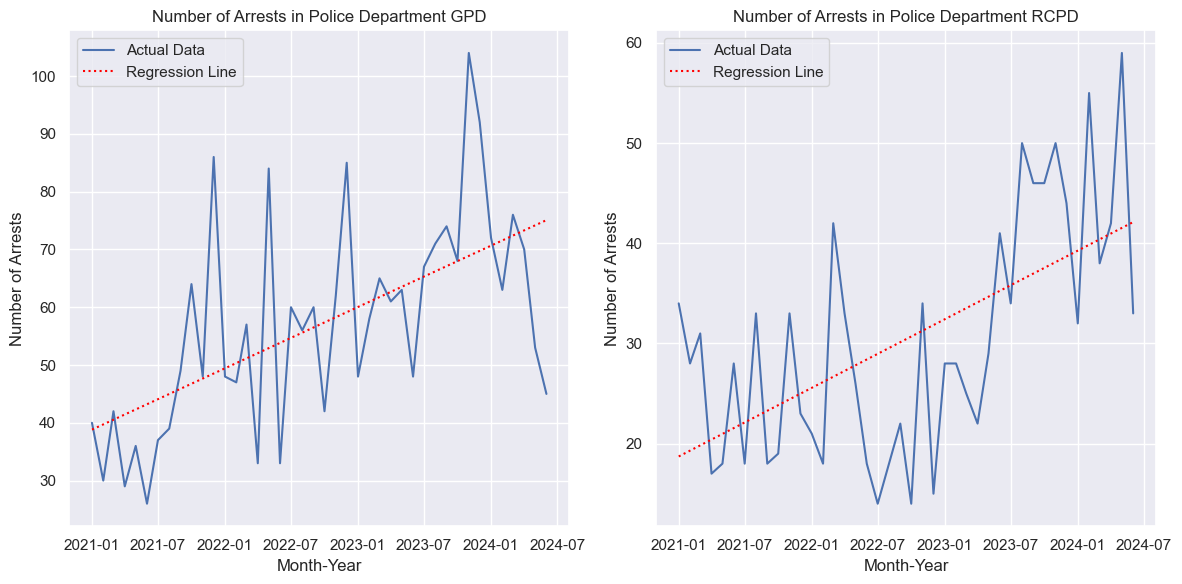

In [221]:
fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows), squeeze=False)

axes = axes.flatten()

for i, (dpt, data) in enumerate(arrest_by_dpt.items()):
    ax = axes[i]
    
    dates = pd.to_datetime(data.index)
    X = (dates - pd.Timestamp('1970-01-01')) // pd.Timedelta('1D')
    X = X.values.reshape(-1, 1)

    y = data.values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    dates_pred = pd.to_datetime(X.flatten(), origin='1970-01-01', unit='D')

    ax.plot(dates, y, label='Actual Data')
    ax.plot(dates_pred, y_pred, color='red', label='Regression Line', linestyle='dotted')

    ax.set_title(f'Number of Arrests in Police Department {dpt}')
    ax.set_xlabel('Month-Year')
    ax.set_ylabel('Number of Arrests')
    ax.grid(True)
    ax.legend()

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
    
### Comparative Analysis of Gaithersburg and Rockville City Police Departments.

In [223]:
def categorize_age(age):
    if 10 <= age <= 18:
        return '10-18'
    elif 19 <= age <= 29:
        return '18-29'
    elif 30 <= age <= 59:
        return '30-59'
    elif 60 <= age <= 80:
        return '60-80'
    else:
        return 'Unknown'


df_pd['Age Group'] = df_pd["Subject's age"].apply(categorize_age)

age_race_summary = pd.crosstab(index=df_pd['Assigned Division'], columns=df_pd["Age Group"])
age_race_summary

Age Group,10-18,18-29,30-59,60-80
Assigned Division,,,,
GPD,312,797,1221,61
RCPD,155,411,655,56


In [225]:
def categorize_race(race):
    if race in ['American Indian/ALSK Natv', 'Hawaiian/Pacific Islander', 'Asian']:
        return 'Asian, Other'
    else:
        return race

df_pd["Subject's race"] = df_pd["Subject's race"].apply(categorize_race)

race_summary = pd.crosstab(index=df_pd['Age Group'], columns=df_pd["Subject's race"])
race_summary.columns = race_summary.columns.map(lambda x: 'Asian, Other' if x in ['American Indian/ALSK Natv', 'Hawaiian/Pacific Islander', 'Asian'] else x)

race_summary

Subject's race,"Asian, Other",Black/African American,White
Age Group,,,
10-18,14,232,221
18-29,36,470,702
30-59,59,623,1194
60-80,10,43,64


In [227]:
race_summary = pd.crosstab(
    index=df_pd['Assigned Division'],
    columns=[df_pd["Subject's race"], df_pd["Ethnicity"]],
    dropna=False
)

race_summary

Subject's race    Asian, Other              Black/African American  \
Ethnicity             HISPANIC NON-HISPANIC               HISPANIC   
Assigned Division                                                    
GPD                          1           60                     24   
RCPD                         3           55                     11   

Subject's race                    White               
Ethnicity         NON-HISPANIC HISPANIC NON-HISPANIC  
Assigned Division                                     
GPD                        712     1172          422  
RCPD                       621      303          284

In [229]:
age_race_summary = pd.crosstab(
    index=[df_pd['Assigned Division'], df_pd['Age Group']],
    columns=[df_pd["Subject's race"], df_pd["Ethnicity"]],
    dropna=False
)

age_race_summary_reset = age_race_summary.reset_index()

age_race_summary_reset

Subject's race Assigned Division Age Group Asian, Other               \
Ethnicity                                      HISPANIC NON-HISPANIC   
0                            GPD     10-18            0            9   
1                            GPD     18-29            0           21   
2                            GPD     30-59            1           28   
3                            GPD     60-80            0            2   
4                           RCPD     10-18            0            5   
5                           RCPD     18-29            2           13   
6                           RCPD     30-59            1           29   
7                           RCPD     60-80            0            8   

Subject's race Black/African American                 White               
Ethnicity                    HISPANIC NON-HISPANIC HISPANIC NON-HISPANIC  
0                                   2          151      108           42  
1                                   8          236      426          106  
2                                  14          304      630          244  
3                                   0           21        8           30  
4                                   1           78       40           31  
5                                   1          225      110           60  
6                                   9          296      149          171  
7                                   0           22        4           22

In [231]:
age_race = pd.crosstab(
    index=[df_pd['Assigned Division'], df_pd['Age Group']],
    columns=df_pd["Subject's race"],
    dropna=False
)

age_race_reset = age_race.reset_index()

age_race_reset

Subject's race,Assigned Division,Age Group,"Asian, Other",Black/African American,White
0,GPD,10-18,9,153,150
1,GPD,18-29,21,244,532
2,GPD,30-59,29,318,874
3,GPD,60-80,2,21,38
4,RCPD,10-18,5,79,71
5,RCPD,18-29,15,226,170
6,RCPD,30-59,30,305,320
7,RCPD,60-80,8,22,26


In [233]:
divisions = ['Gaithersburg (GPD)', 'Rockville City (RCPD)']
age_groups = age_race_reset['Age Group'].unique()
races = age_race_reset.columns[2:]

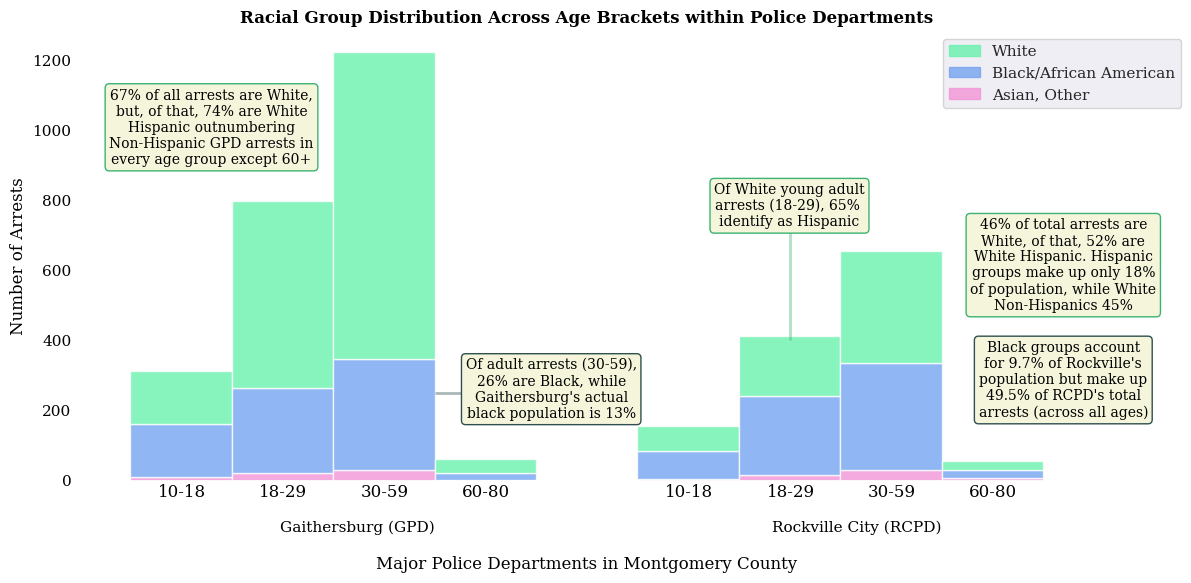

In [235]:
fig, ax = plt.subplots(figsize=(12, 6))

font_title = {'family': 'serif', 'color': 'black', 'weight': 'bold'}
font_other = {'family': 'serif', 'color': 'black'}
font_serif = {'family': 'serif', 'color': 'black'}

group_width = 0.8
bar_width = group_width / len(age_groups)

group_offsets = np.arange(len(divisions))
colors = ['#f294d7', '#75a4f0', '#69f0ad']

for i, age_group in enumerate(age_groups):
    bottom = np.zeros(len(divisions))
    for j, race in enumerate(races):
        values = age_race_reset[age_race_reset['Age Group'] == age_group][race].values
        bars = ax.bar(group_offsets + i * bar_width, values, bar_width, bottom=bottom,
                label=f'{race}' if i == 0 else "", color=colors[j], alpha=0.8)
        bottom += values

xticks = group_offsets + group_width / 2
shift_amount = 0.1  # Adjust this value as needed
shifted_xticks = xticks + shift_amount
ax.set_xticks(shifted_xticks)
ticks = ax.get_xticks()
labels = ax.get_xticklabels()
for pos, label in zip(ticks, labels):
    label.set_y(-.06)
ax.set_xticklabels(divisions, ha='right', **font_serif)

yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.set_yticklabels([f'{int(tick)}' for tick in yticks], **font_serif)

for i, div in enumerate(divisions):
    for j, age_group in enumerate(age_groups):
        ax.text(
            xticks[i] + (j - len(age_groups) / 2) * bar_width + bar_width / 100,
            -10,
            age_group,
            ha='center',
            va='top',
            fontsize=12,
            **font_serif
        )

ax.text(
    x=xticks[1] + .34,
    y=400,
    s="Black groups account\nfor 9.7% of Rockville's\npopulation but make up\n49.5% of RCPD's total\narrests (across all ages)",
    ha='center',
    va='top',
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='darkslategray', facecolor='beige'),
    **font_serif
)

ax.text(
    x=xticks[1] + .34,
    y=750,
    s = "46% of total arrests are\nWhite, of that, 52% are\nWhite Hispanic. Hispanic\ngroups make up only 18%\nof population, while White\nNon-Hispanics 45%",
    ha='center',
    va='top',
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='mediumseagreen', facecolor='beige'),
    **font_serif
)

ax.text(
    x=xticks[1] - .2,
    y=850,
    s = "Of White young adult\narrests (18-29), 65% \nidentify as Hispanic",
    ha='center',
    va='top',
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='mediumseagreen', facecolor='beige'),
    **font_serif
)
ax.vlines(x=xticks[1] - .2,ymin=400,ymax=850,color='mediumseagreen',linewidth=2,alpha=0.4)

ax.text(
    x=xticks[0] - .34,
    y=1120,
    s="67% of all arrests are White,\nbut, of that, 74% are White\nHispanic outnumbering\nNon-Hispanic GPD arrests in\nevery age group except 60+",
    ha='center',
    va='top',
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='mediumseagreen', facecolor='beige'),
    **font_serif
)

ax.text(
    x=xticks[0] + .33,
    y=350,
    s="Of adult arrests (30-59),\n26% are Black, while\nGaithersburg's actual\nblack population is 13%",
    ha='center',
    va='top',
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='darkslategray', facecolor='beige'),
    **font_serif
)
ax.hlines(y=250,xmin=xticks[0]+.33,xmax=xticks[0]+.1,color='darkslategray',linewidth=2,alpha=0.4)

ax.set_xlabel('Major Police Departments in Montgomery County', **font_other, labelpad=15)
ax.set_ylabel('Number of Arrests', **font_other)
ax.set_title('Racial Group Distribution Across Age Brackets within Police Departments', **font_title)

custom_order = ['White', 'Black/African American', 'Asian, Other'] 
handles = [plt.Rectangle((0,0),1,1, color=colors[races.get_loc(race)], alpha=0.8) for race in custom_order]
labels = custom_order

ax.legend(handles, labels, title_fontsize='12', loc='upper right', prop={'family': 'serif'}, bbox_to_anchor=(1.1, 1))

fig.patch.set_facecolor('white') 
ax.set_facecolor('white')

plt.grid(False) 
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
    
As of the 2022 American Community Survey, 13% of Gaithersburg, Maryland's population is Black or African American. This makes Black or African American the second most common ethnic group in the town, after White (Non-Hispanic) residents, who make up 33% of the population. Asian (Non-Hispanic) residents make up 15% of the population, and Hispanic people of any race make up 36%. 


<div class="alert alert-block alert-success">
GPD:
    
- Jurisdiction: Primarily focused on the city of Gaithersburg.
- Focus: Works closely with the community to address local crime and safety concerns.
- Size: Smaller department compared to MCPD, but still provides comprehensive law enforcement services within the city.

MCPD:

- Jurisdiction: Covers the entire Montgomery County, including the city of Gaithersburg.
- Focus: Handles a wide range of law enforcement duties, including major crimes, traffic enforcement, and community policing.
- Size: Larger department with more resources and specialized units.

